In [3]:
# CELDA 1: IMPORTACIÓN DE LIBRERÍAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, confusion_matrix
from scipy import stats
from scipy.stats import shapiro, jarque_bera

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [4]:
# CELDA 2: CARGA Y COMBINACIÓN DE DATOS
math_df = pd.read_excel('Student Performance/Maths.xlsx')
port_df = pd.read_excel('Student Performance/Portuguese.xlsx')

math_df['subject'] = 'math'
port_df['subject'] = 'portuguese'

df = pd.concat([math_df, port_df], ignore_index=True)

print("="*80)
print("DATASET COMBINADO")
print("="*80)
print(f"Total registros: {df.shape[0]}")
print(f"Total columnas: {df.shape[1]}")
print(f"Matemáticas: {len(math_df)} estudiantes")
print(f"Portugués: {len(port_df)} estudiantes")

DATASET COMBINADO
Total registros: 1048
Total columnas: 34
Matemáticas: 397 estudiantes
Portugués: 651 estudiantes


In [5]:
# CELDA 3: CODIFICACIÓN DE VARIABLES CATEGÓRICAS
le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_columns:
    df[col] = le.fit_transform(df[col].astype(str))

print(f"Variables categóricas codificadas: {len(categorical_columns)}")
print(f"Columnas: {categorical_columns}")

Variables categóricas codificadas: 18
Columnas: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'subject']


In [6]:
# CELDA 4: SELECCIÓN DE VARIABLES Y ESTADÍSTICAS DESCRIPTIVAS
features = ['G1', 'G2', 'studytime', 'failures', 'absences']
target = 'G3'

X = df[features]
y = df[target]

print("="*80)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES PREDICTORAS")
print("="*80)
print(X.describe())

print("\n" + "="*80)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLE OBJETIVO (G3)")
print("="*80)
print(y.describe())

ESTADÍSTICAS DESCRIPTIVAS - VARIABLES PREDICTORAS
                G1           G2    studytime     failures     absences
count  1048.000000  1048.000000  1048.000000  1048.000000  1048.000000
mean     11.192748    11.235687     1.969466     0.264313     4.427481
std       3.008277     3.288541     0.833299     0.655434     6.201372
min       0.000000     0.000000     1.000000     0.000000     0.000000
25%       9.000000     9.000000     1.000000     0.000000     0.000000
50%      11.000000    11.000000     2.000000     0.000000     2.000000
75%      13.000000    13.000000     2.000000     0.000000     6.000000
max      19.000000    19.000000     4.000000     3.000000    75.000000

ESTADÍSTICAS DESCRIPTIVAS - VARIABLE OBJETIVO (G3)
count    1048.000000
mean       11.326336
std         3.876852
min         0.000000
25%        10.000000
50%        11.000000
75%        14.000000
max        20.000000
Name: G3, dtype: float64


In [7]:
# CELDA 5: MATRIZ DE CORRELACIÓN (NUMÉRICA)
correlation_matrix = df[features + [target]].corr()

print("="*80)
print("MATRIZ DE CORRELACIÓN")
print("="*80)
print(correlation_matrix)

MATRIZ DE CORRELACIÓN
                 G1        G2  studytime  failures  absences        G3
G1         1.000000  0.854080   0.210762 -0.369789 -0.090689  0.804787
G2         0.854080  1.000000   0.184565 -0.377221 -0.088263  0.910925
studytime  0.210762  0.184565   1.000000 -0.153087 -0.074729  0.163919
failures  -0.369789 -0.377221  -0.153087  1.000000  0.099301 -0.383542
absences  -0.090689 -0.088263  -0.074729  0.099301  1.000000 -0.043867
G3         0.804787  0.910925   0.163919 -0.383542 -0.043867  1.000000


In [8]:
# CELDA 5: MATRIZ DE CORRELACIÓN (NUMÉRICA)
correlation_matrix = df[features + [target]].corr()

print("="*80)
print("MATRIZ DE CORRELACIÓN")
print("="*80)
print(correlation_matrix)

MATRIZ DE CORRELACIÓN
                 G1        G2  studytime  failures  absences        G3
G1         1.000000  0.854080   0.210762 -0.369789 -0.090689  0.804787
G2         0.854080  1.000000   0.184565 -0.377221 -0.088263  0.910925
studytime  0.210762  0.184565   1.000000 -0.153087 -0.074729  0.163919
failures  -0.369789 -0.377221  -0.153087  1.000000  0.099301 -0.383542
absences  -0.090689 -0.088263  -0.074729  0.099301  1.000000 -0.043867
G3         0.804787  0.910925   0.163919 -0.383542 -0.043867  1.000000


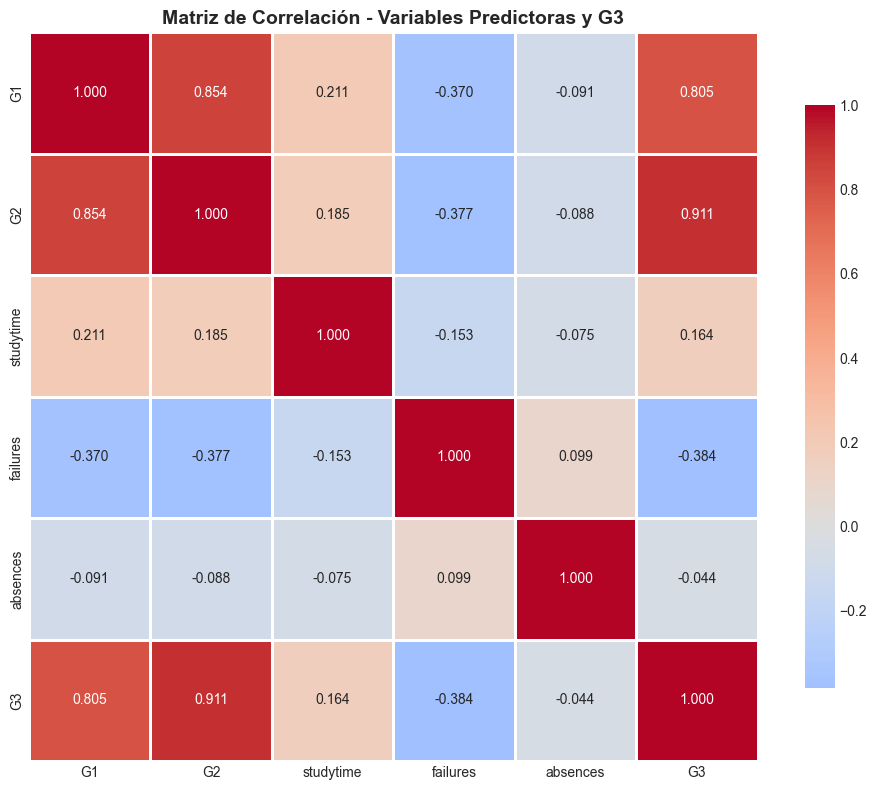

In [9]:
# CELDA 6: VISUALIZACIÓN - MATRIZ DE CORRELACIÓN
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlación - Variables Predictoras y G3', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

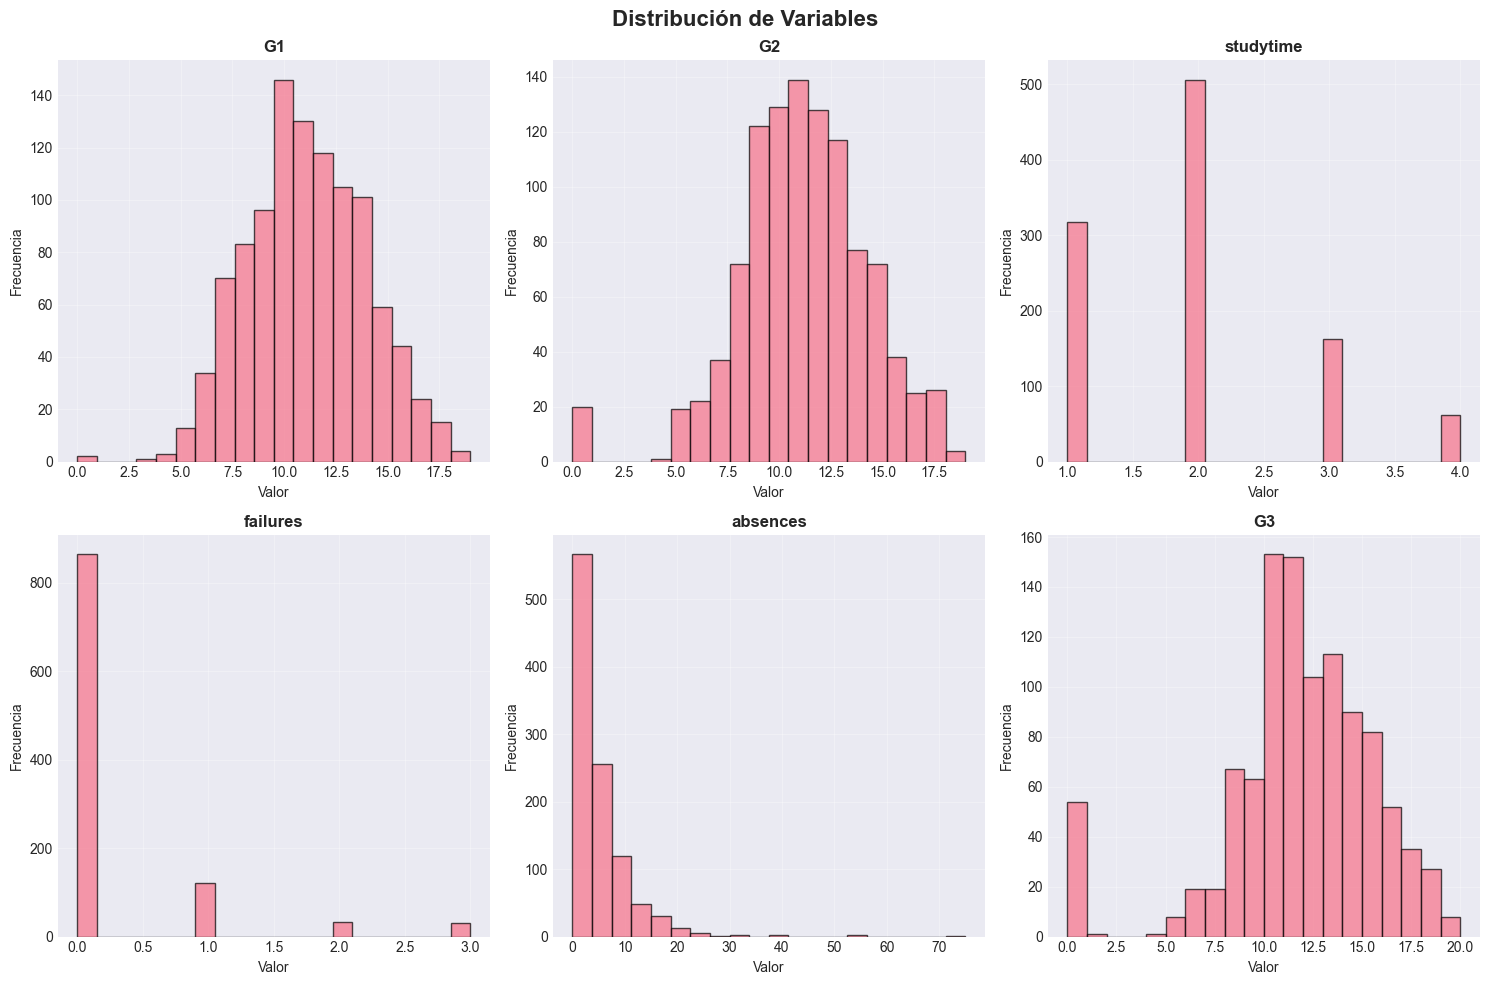

In [10]:
# CELDA 7: VISUALIZACIÓN - DISTRIBUCIÓN DE VARIABLES
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribución de Variables', fontsize=16, fontweight='bold')

for idx, col in enumerate(features + [target]):
    row = idx // 3
    col_pos = idx % 3
    axes[row, col_pos].hist(df[col], bins=20, edgecolor='black', alpha=0.7)
    axes[row, col_pos].set_title(f'{col}', fontweight='bold')
    axes[row, col_pos].set_xlabel('Valor')
    axes[row, col_pos].set_ylabel('Frecuencia')
    axes[row, col_pos].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

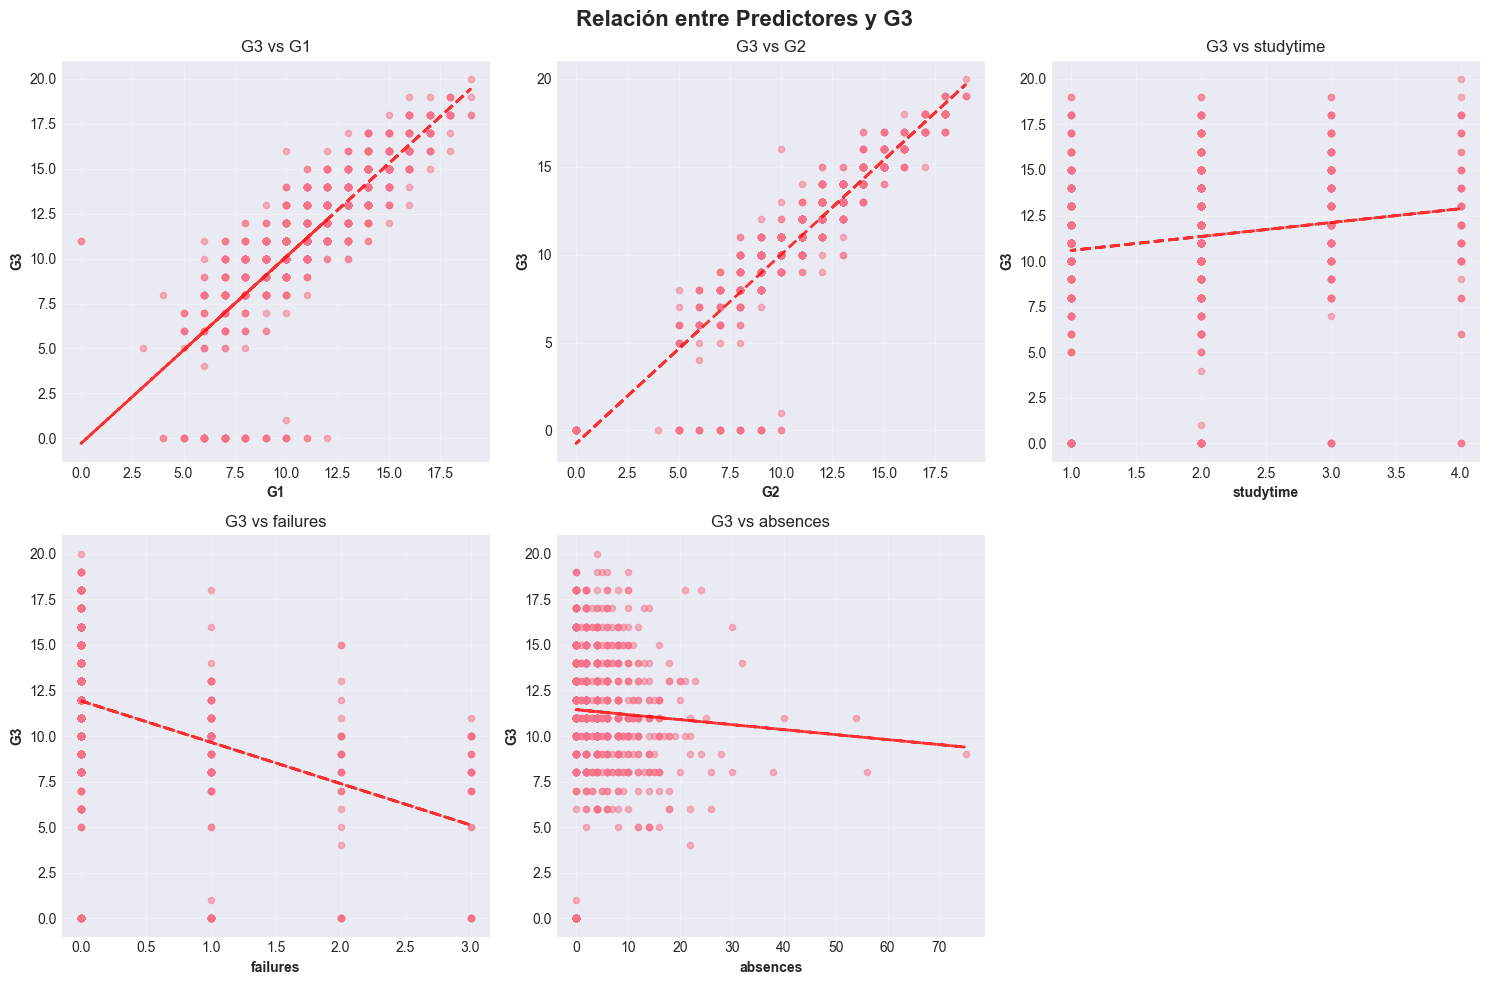

In [11]:
# CELDA 8: VISUALIZACIÓN - RELACIÓN PREDICTORES CON G3
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Relación entre Predictores y G3', fontsize=16, fontweight='bold')

for idx, feature in enumerate(features):
    row = idx // 3
    col_pos = idx % 3
    axes[row, col_pos].scatter(df[feature], df[target], alpha=0.5, s=20)
    axes[row, col_pos].set_xlabel(feature, fontweight='bold')
    axes[row, col_pos].set_ylabel('G3', fontweight='bold')
    axes[row, col_pos].set_title(f'G3 vs {feature}')
    axes[row, col_pos].grid(True, alpha=0.3)
    
    # Línea de tendencia
    z = np.polyfit(df[feature], df[target], 1)
    p = np.poly1d(z)
    axes[row, col_pos].plot(df[feature], p(df[feature]), "r--", alpha=0.8, linewidth=2)

axes[1, 2].axis('off')
plt.tight_layout()
plt.show()

In [12]:
# CELDA 9: ESCALADO Y DIVISIÓN DE DATOS
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("="*80)
print("DIVISIÓN DE DATOS")
print("="*80)
print(f"Conjunto entrenamiento: {X_train.shape[0]} muestras ({(X_train.shape[0]/len(X))*100:.1f}%)")
print(f"Conjunto prueba: {X_test.shape[0]} muestras ({(X_test.shape[0]/len(X))*100:.1f}%)")

DIVISIÓN DE DATOS
Conjunto entrenamiento: 838 muestras (80.0%)
Conjunto prueba: 210 muestras (20.0%)


In [13]:
# CELDA 10: ENTRENAMIENTO MODELO LINEAL
print("="*80)
print("MODELO 1: REGRESIÓN LINEAL MÚLTIPLE")
print("="*80)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear_train = linear_model.predict(X_train)
y_pred_linear_test = linear_model.predict(X_test)

# Métricas Train
r2_linear_train = r2_score(y_train, y_pred_linear_train)
mse_linear_train = mean_squared_error(y_train, y_pred_linear_train)
rmse_linear_train = np.sqrt(mse_linear_train)
mae_linear_train = mean_absolute_error(y_train, y_pred_linear_train)
mape_linear_train = mean_absolute_percentage_error(y_train, y_pred_linear_train) * 100

# Métricas Test
r2_linear_test = r2_score(y_test, y_pred_linear_test)
mse_linear_test = mean_squared_error(y_test, y_pred_linear_test)
rmse_linear_test = np.sqrt(mse_linear_test)
mae_linear_test = mean_absolute_error(y_test, y_pred_linear_test)
mape_linear_test = mean_absolute_percentage_error(y_test, y_pred_linear_test) * 100

print("\nMÉTRICAS - CONJUNTO DE ENTRENAMIENTO:")
print(f"  R² Score: {r2_linear_train:.6f}")
print(f"  MSE: {mse_linear_train:.6f}")
print(f"  RMSE: {rmse_linear_train:.6f}")
print(f"  MAE: {mae_linear_train:.6f}")
print(f"  MAPE: {mape_linear_train:.4f}%")

print("\nMÉTRICAS - CONJUNTO DE PRUEBA:")
print(f"  R² Score: {r2_linear_test:.6f}")
print(f"  MSE: {mse_linear_test:.6f}")
print(f"  RMSE: {rmse_linear_test:.6f}")
print(f"  MAE: {mae_linear_test:.6f}")
print(f"  MAPE: {mape_linear_test:.4f}%")

# Coeficientes
print("\nCOEFICIENTES DEL MODELO:")
print(f"  Intercepto: {linear_model.intercept_:.6f}")
for feature, coef in zip(features, linear_model.coef_):
    print(f"  {feature:12s}: {coef:.6f}")

MODELO 1: REGRESIÓN LINEAL MÚLTIPLE

MÉTRICAS - CONJUNTO DE ENTRENAMIENTO:
  R² Score: 0.841242
  MSE: 2.385741
  RMSE: 1.544584
  MAE: 0.931044
  MAPE: 96951902135406656.0000%

MÉTRICAS - CONJUNTO DE PRUEBA:
  R² Score: 0.810399
  MSE: 2.837923
  RMSE: 1.684614
  MAE: 0.962421
  MAPE: 104092158918764752.0000%

COEFICIENTES DEL MODELO:
  Intercepto: 11.328492
  G1          : 0.416565
  G2          : 3.126390
  studytime   : -0.045136
  failures    : -0.266055
  absences    : 0.147253


In [14]:
# CELDA 11: VALIDACIÓN CRUZADA MODELO LINEAL
cv_scores_linear = cross_val_score(linear_model, X_scaled, y, cv=5, scoring='r2')

print("="*80)
print("VALIDACIÓN CRUZADA MODELO LINEAL (5-Fold)")
print("="*80)
print(f"R² Scores: {cv_scores_linear}")
print(f"R² Promedio: {cv_scores_linear.mean():.6f} (+/- {cv_scores_linear.std() * 2:.6f})")

VALIDACIÓN CRUZADA MODELO LINEAL (5-Fold)
R² Scores: [0.88721703 0.74138416 0.741612   0.85601702 0.82824174]
R² Promedio: 0.810894 (+/- 0.119311)


In [15]:
# CELDA 12: ENTRENAMIENTO MODELO POLINÓMICO
print("="*80)
print("MODELO 2: REGRESIÓN POLINÓMICA (GRADO 2)")
print("="*80)

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

print(f"Características originales: {X_train.shape[1]}")
print(f"Características polinómicas: {X_train_poly.shape[1]}")
print(f"Nombres características: {poly_features.get_feature_names_out(features)[:10]}... (primeras 10)")

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly_train = poly_model.predict(X_train_poly)
y_pred_poly_test = poly_model.predict(X_test_poly)

# Métricas Train
r2_poly_train = r2_score(y_train, y_pred_poly_train)
mse_poly_train = mean_squared_error(y_train, y_pred_poly_train)
rmse_poly_train = np.sqrt(mse_poly_train)
mae_poly_train = mean_absolute_error(y_train, y_pred_poly_train)
mape_poly_train = mean_absolute_percentage_error(y_train, y_pred_poly_train) * 100

# Métricas Test
r2_poly_test = r2_score(y_test, y_pred_poly_test)
mse_poly_test = mean_squared_error(y_test, y_pred_poly_test)
rmse_poly_test = np.sqrt(mse_poly_test)
mae_poly_test = mean_absolute_error(y_test, y_pred_poly_test)
mape_poly_test = mean_absolute_percentage_error(y_test, y_pred_poly_test) * 100

print("\nMÉTRICAS - CONJUNTO DE ENTRENAMIENTO:")
print(f"  R² Score: {r2_poly_train:.6f}")
print(f"  MSE: {mse_poly_train:.6f}")
print(f"  RMSE: {rmse_poly_train:.6f}")
print(f"  MAE: {mae_poly_train:.6f}")
print(f"  MAPE: {mape_poly_train:.4f}%")

print("\nMÉTRICAS - CONJUNTO DE PRUEBA:")
print(f"  R² Score: {r2_poly_test:.6f}")
print(f"  MSE: {mse_poly_test:.6f}")
print(f"  RMSE: {rmse_poly_test:.6f}")
print(f"  MAE: {mae_poly_test:.6f}")
print(f"  MAPE: {mape_poly_test:.4f}%")

MODELO 2: REGRESIÓN POLINÓMICA (GRADO 2)
Características originales: 5
Características polinómicas: 20
Nombres características: ['G1' 'G2' 'studytime' 'failures' 'absences' 'G1^2' 'G1 G2' 'G1 studytime'
 'G1 failures' 'G1 absences']... (primeras 10)

MÉTRICAS - CONJUNTO DE ENTRENAMIENTO:
  R² Score: 0.852156
  MSE: 2.221741
  RMSE: 1.490550
  MAE: 0.939769
  MAPE: 92454586732574000.0000%

MÉTRICAS - CONJUNTO DE PRUEBA:
  R² Score: 0.817344
  MSE: 2.733979
  RMSE: 1.653475
  MAE: 0.963719
  MAPE: 107555661452442592.0000%


In [16]:
# CELDA 13: VALIDACIÓN CRUZADA MODELO POLINÓMICO
X_scaled_poly = poly_features.fit_transform(X_scaled)
cv_scores_poly = cross_val_score(poly_model, X_scaled_poly, y, cv=5, scoring='r2')

print("="*80)
print("VALIDACIÓN CRUZADA MODELO POLINÓMICO (5-Fold)")
print("="*80)
print(f"R² Scores: {cv_scores_poly}")
print(f"R² Promedio: {cv_scores_poly.mean():.6f} (+/- {cv_scores_poly.std() * 2:.6f})")

VALIDACIÓN CRUZADA MODELO POLINÓMICO (5-Fold)
R² Scores: [0.88607143 0.74982836 0.73280224 0.84177177 0.81309577]
R² Promedio: 0.804714 (+/- 0.114005)


In [17]:
# CELDA 14: COMPARACIÓN DE MODELOS (TABLA)
print("="*80)
print("COMPARACIÓN DE MODELOS")
print("="*80)

comparison_df = pd.DataFrame({
    'Métrica': ['R²', 'MSE', 'RMSE', 'MAE', 'MAPE (%)'],
    'Lineal_Train': [r2_linear_train, mse_linear_train, rmse_linear_train, mae_linear_train, mape_linear_train],
    'Lineal_Test': [r2_linear_test, mse_linear_test, rmse_linear_test, mae_linear_test, mape_linear_test],
    'Poli_Train': [r2_poly_train, mse_poly_train, rmse_poly_train, mae_poly_train, mape_poly_train],
    'Poli_Test': [r2_poly_test, mse_poly_test, rmse_poly_test, mae_poly_test, mape_poly_test]
})

print("\n")
print(comparison_df.to_string(index=False))

# Diferencias
print(f"\nDIFERENCIAS (Polinómico - Lineal) EN TEST:")
print(f"  ΔR²: {r2_poly_test - r2_linear_test:+.6f}")
print(f"  ΔMSE: {mse_poly_test - mse_linear_test:+.6f}")
print(f"  ΔRMSE: {rmse_poly_test - rmse_linear_test:+.6f}")
print(f"  ΔMAE: {mae_poly_test - mae_linear_test:+.6f}")
print(f"  ΔMAPE: {mape_poly_test - mape_linear_test:+.4f}%")

# Mejora porcentual
mejora_r2 = ((r2_poly_test - r2_linear_test) / r2_linear_test) * 100
mejora_rmse = ((rmse_linear_test - rmse_poly_test) / rmse_linear_test) * 100
print(f"\nMEJORA PORCENTUAL (Polinómico vs Lineal):")
print(f"  R²: {mejora_r2:+.2f}%")
print(f"  RMSE: {mejora_rmse:+.2f}%")

COMPARACIÓN DE MODELOS


 Métrica  Lineal_Train  Lineal_Test   Poli_Train    Poli_Test
      R²  8.412423e-01 8.103993e-01 8.521556e-01 8.173438e-01
     MSE  2.385741e+00 2.837923e+00 2.221741e+00 2.733979e+00
    RMSE  1.544584e+00 1.684614e+00 1.490550e+00 1.653475e+00
     MAE  9.310441e-01 9.624213e-01 9.397690e-01 9.637190e-01
MAPE (%)  9.695190e+16 1.040922e+17 9.245459e+16 1.075557e+17

DIFERENCIAS (Polinómico - Lineal) EN TEST:
  ΔR²: +0.006944
  ΔMSE: -0.103944
  ΔRMSE: -0.031139
  ΔMAE: +0.001298
  ΔMAPE: +3463502533677840.0000%

MEJORA PORCENTUAL (Polinómico vs Lineal):
  R²: +0.86%
  RMSE: +1.85%


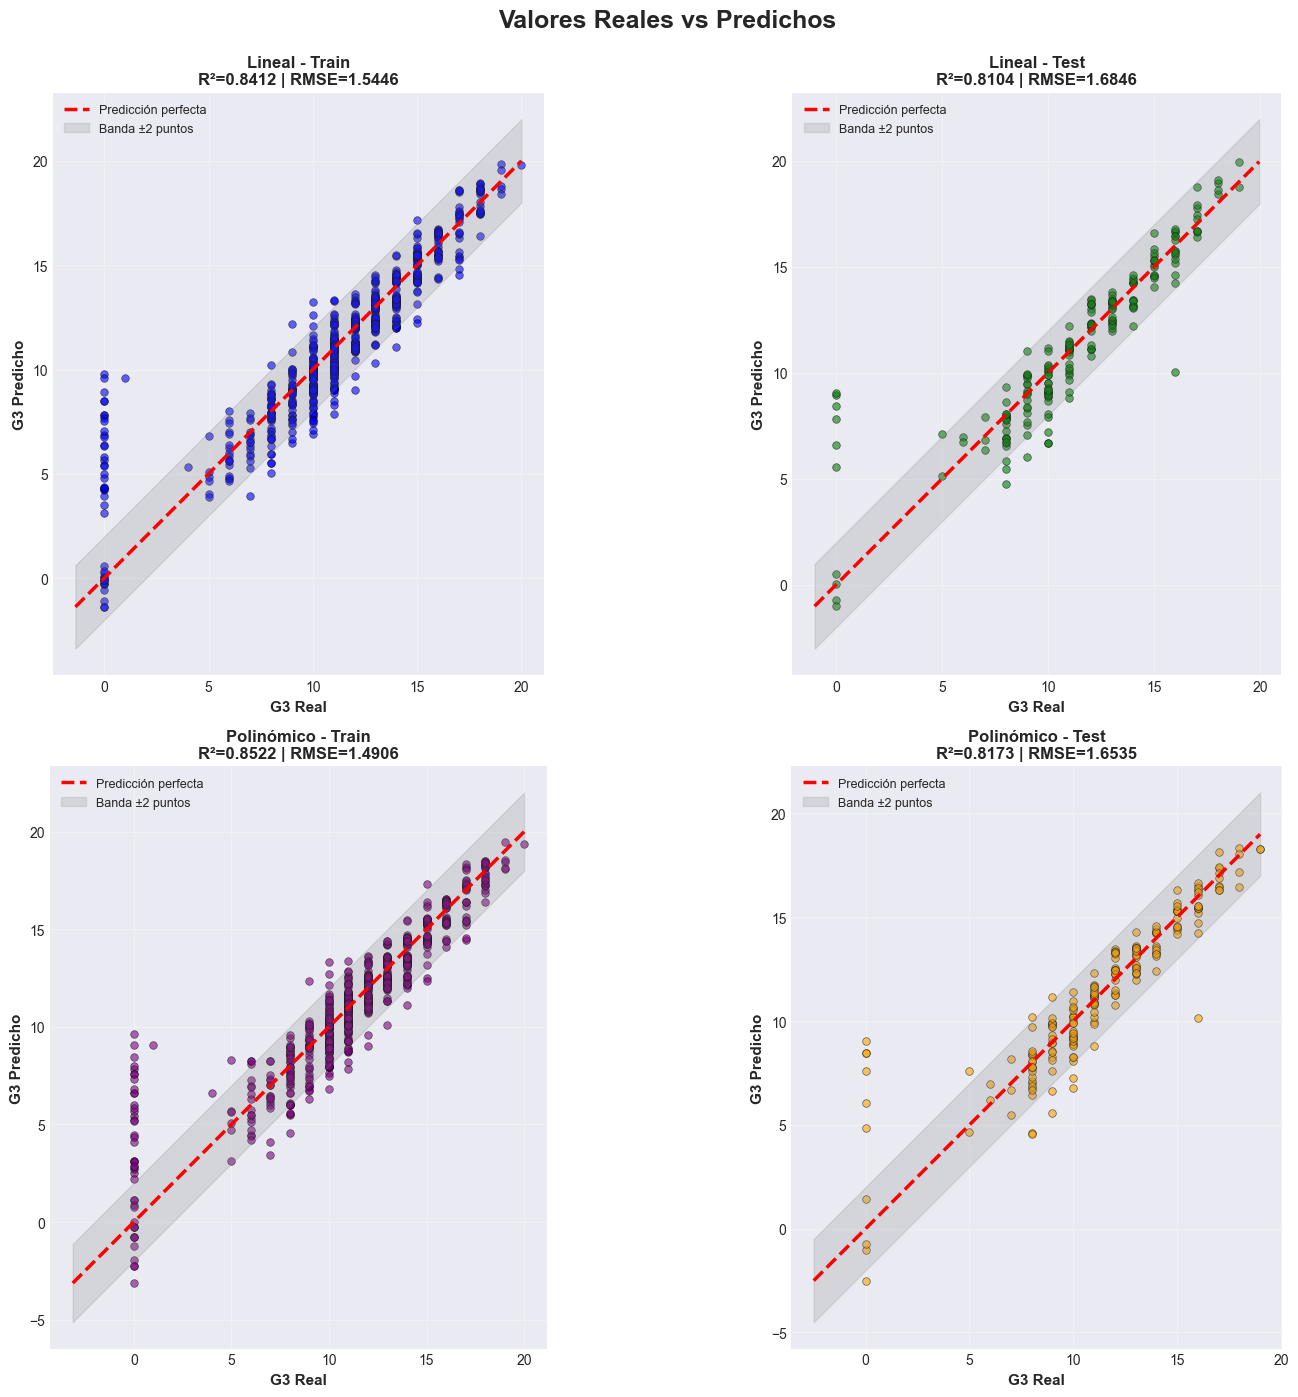

In [18]:
# CELDA 15: VISUALIZACIÓN - REAL VS PREDICHO (4 SUBPLOTS)
fig, axes = plt.subplots(2, 2, figsize=(16, 14))
fig.suptitle('Valores Reales vs Predichos', fontsize=18, fontweight='bold', y=0.995)

plots_config = [
    (y_train, y_pred_linear_train, 'Lineal - Train', 'blue', r2_linear_train, rmse_linear_train, 0, 0),
    (y_test, y_pred_linear_test, 'Lineal - Test', 'green', r2_linear_test, rmse_linear_test, 0, 1),
    (y_train, y_pred_poly_train, 'Polinómico - Train', 'purple', r2_poly_train, rmse_poly_train, 1, 0),
    (y_test, y_pred_poly_test, 'Polinómico - Test', 'orange', r2_poly_test, rmse_poly_test, 1, 1)
]

for y_true, y_pred, title, color, r2, rmse, row, col in plots_config:
    axes[row, col].scatter(y_true, y_pred, alpha=0.6, s=30, color=color, edgecolors='black', linewidth=0.5)
    
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    axes[row, col].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2.5, label='Predicción perfecta')
    
    axes[row, col].fill_between([min_val, max_val], [min_val-2, max_val-2], [min_val+2, max_val+2], 
                                 alpha=0.2, color='gray', label='Banda ±2 puntos')
    
    axes[row, col].set_xlabel('G3 Real', fontsize=11, fontweight='bold')
    axes[row, col].set_ylabel('G3 Predicho', fontsize=11, fontweight='bold')
    axes[row, col].set_title(f'{title}\nR²={r2:.4f} | RMSE={rmse:.4f}', fontsize=12, fontweight='bold')
    axes[row, col].grid(True, alpha=0.3)
    axes[row, col].legend(loc='upper left', fontsize=9)
    axes[row, col].set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

In [19]:
# CELDA 16: CÁLCULO DE RESIDUOS
residuals_linear_train = y_train - y_pred_linear_train
residuals_linear_test = y_test - y_pred_linear_test
residuals_poly_train = y_train - y_pred_poly_train
residuals_poly_test = y_test - y_pred_poly_test

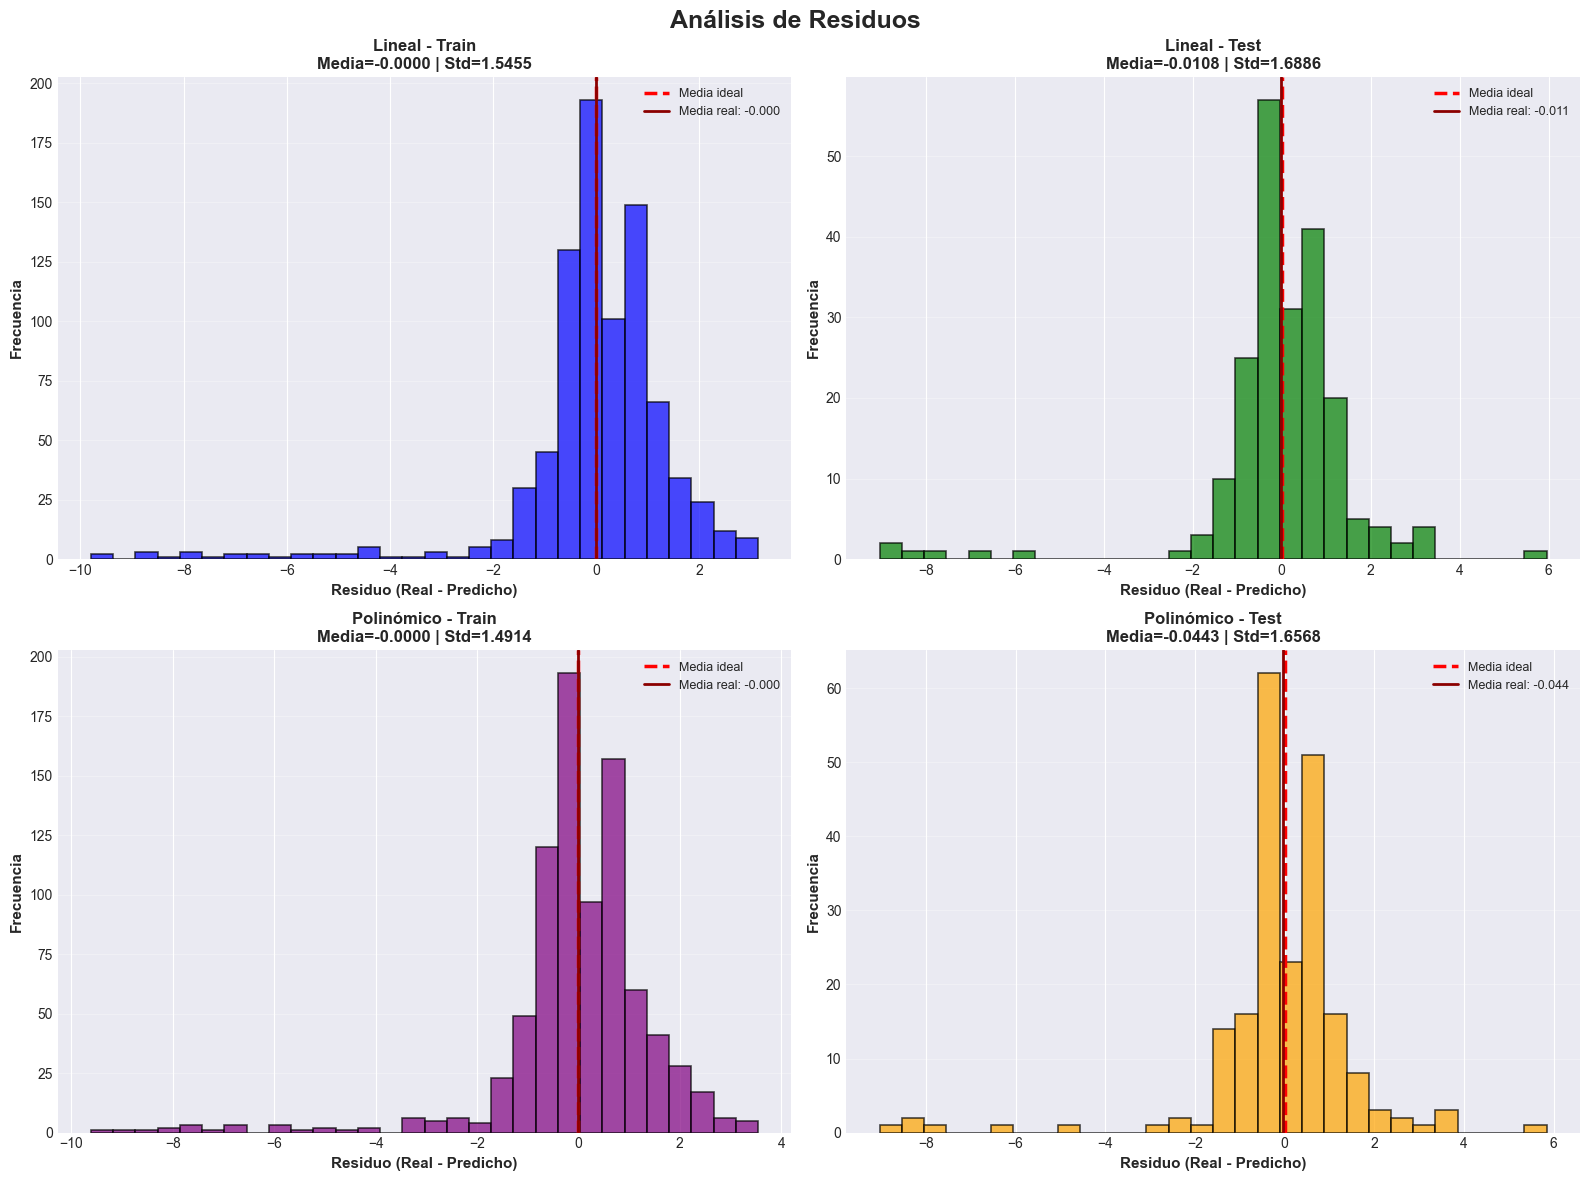

In [20]:
# CELDA 17: VISUALIZACIÓN - DISTRIBUCIÓN DE RESIDUOS
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análisis de Residuos', fontsize=18, fontweight='bold')

residuals_config = [
    (residuals_linear_train, 'Lineal - Train', 'blue', 0, 0),
    (residuals_linear_test, 'Lineal - Test', 'green', 0, 1),
    (residuals_poly_train, 'Polinómico - Train', 'purple', 1, 0),
    (residuals_poly_test, 'Polinómico - Test', 'orange', 1, 1)
]

for residuals, title, color, row, col in residuals_config:
    axes[row, col].hist(residuals, bins=30, color=color, alpha=0.7, edgecolor='black', linewidth=1.2)
    axes[row, col].axvline(x=0, color='red', linestyle='--', linewidth=2.5, label='Media ideal')
    axes[row, col].axvline(x=residuals.mean(), color='darkred', linestyle='-', linewidth=2, 
                           label=f'Media real: {residuals.mean():.3f}')
    axes[row, col].set_xlabel('Residuo (Real - Predicho)', fontsize=11, fontweight='bold')
    axes[row, col].set_ylabel('Frecuencia', fontsize=11, fontweight='bold')
    axes[row, col].set_title(f'{title}\nMedia={residuals.mean():.4f} | Std={residuals.std():.4f}', 
                             fontsize=12, fontweight='bold')
    axes[row, col].grid(True, alpha=0.3, axis='y')
    axes[row, col].legend(fontsize=9)

plt.tight_layout()
plt.show()

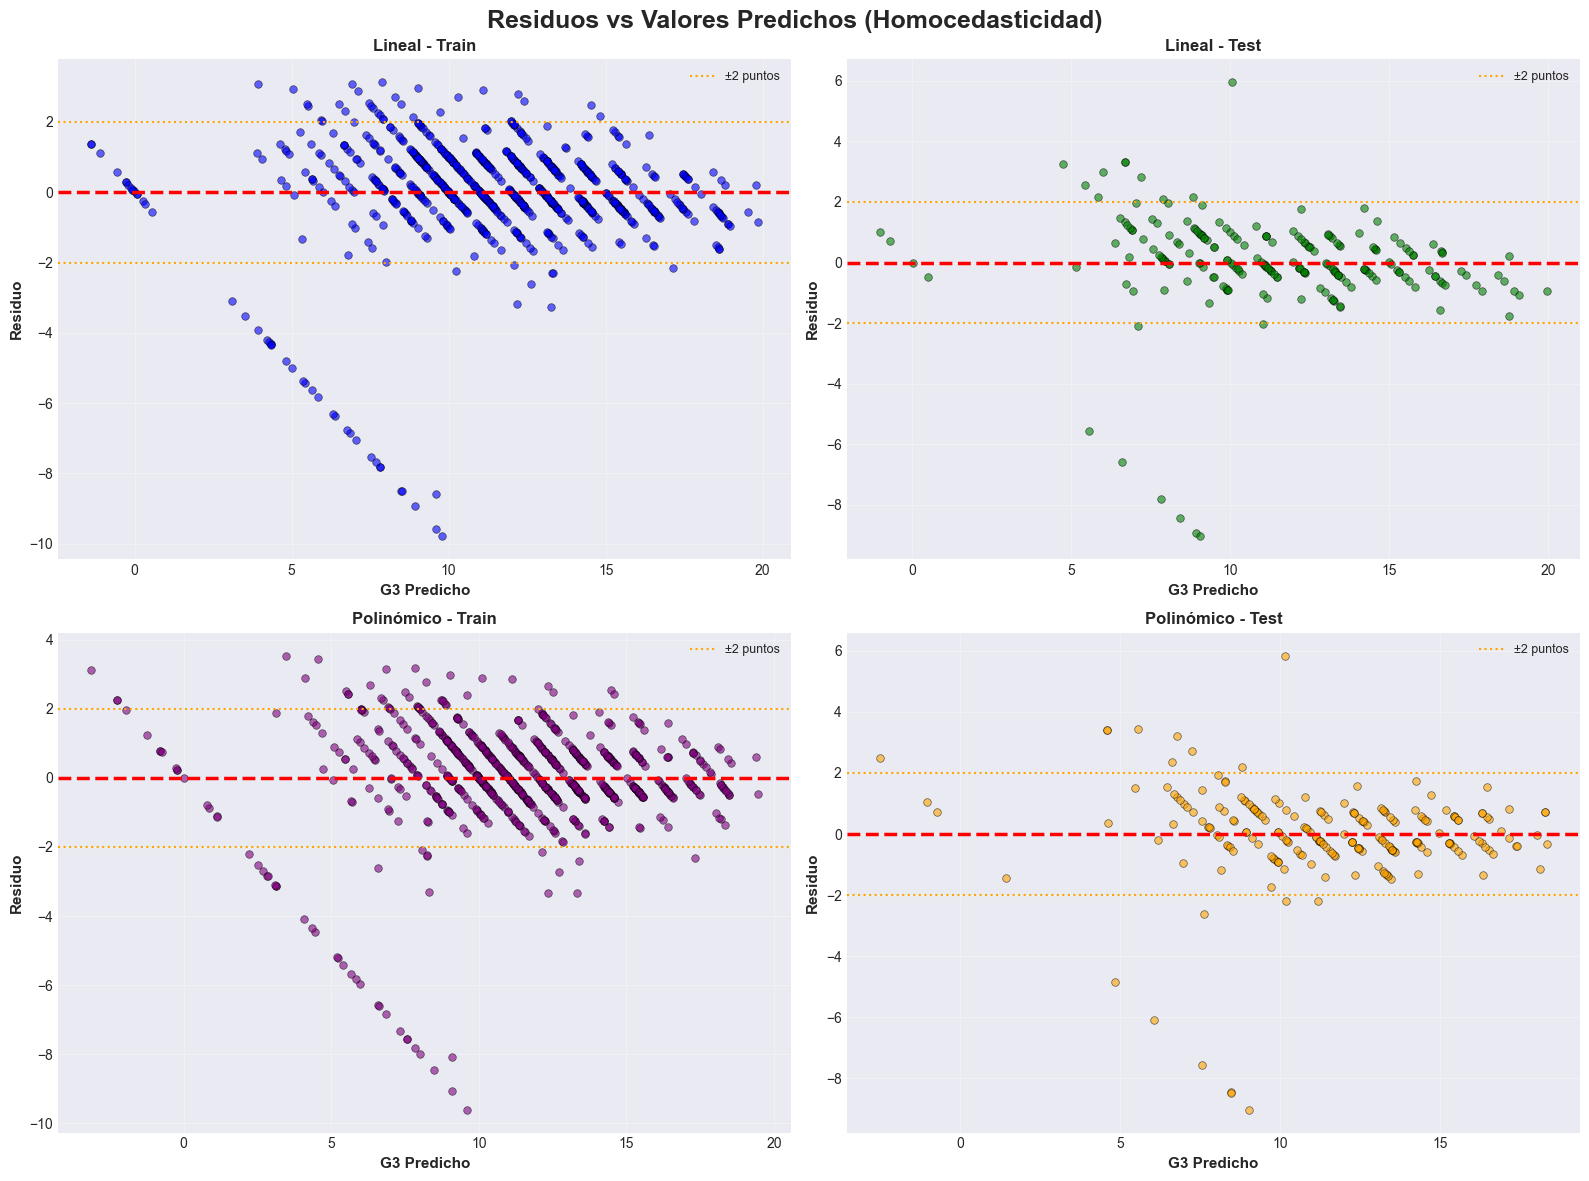

In [21]:
# CELDA 18: VISUALIZACIÓN - RESIDUOS VS VALORES PREDICHOS
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Residuos vs Valores Predichos (Homocedasticidad)', fontsize=18, fontweight='bold')

residual_scatter_config = [
    (y_pred_linear_train, residuals_linear_train, 'Lineal - Train', 'blue', 0, 0),
    (y_pred_linear_test, residuals_linear_test, 'Lineal - Test', 'green', 0, 1),
    (y_pred_poly_train, residuals_poly_train, 'Polinómico - Train', 'purple', 1, 0),
    (y_pred_poly_test, residuals_poly_test, 'Polinómico - Test', 'orange', 1, 1)
]

for y_pred, residuals, title, color, row, col in residual_scatter_config:
    axes[row, col].scatter(y_pred, residuals, alpha=0.6, s=30, color=color, edgecolors='black', linewidth=0.5)
    axes[row, col].axhline(y=0, color='red', linestyle='--', linewidth=2.5)
    axes[row, col].axhline(y=2, color='orange', linestyle=':', linewidth=1.5, label='±2 puntos')
    axes[row, col].axhline(y=-2, color='orange', linestyle=':', linewidth=1.5)
    axes[row, col].set_xlabel('G3 Predicho', fontsize=11, fontweight='bold')
    axes[row, col].set_ylabel('Residuo', fontsize=11, fontweight='bold')
    axes[row, col].set_title(title, fontsize=12, fontweight='bold')
    axes[row, col].grid(True, alpha=0.3)
    axes[row, col].legend(fontsize=9)

plt.tight_layout()
plt.show()

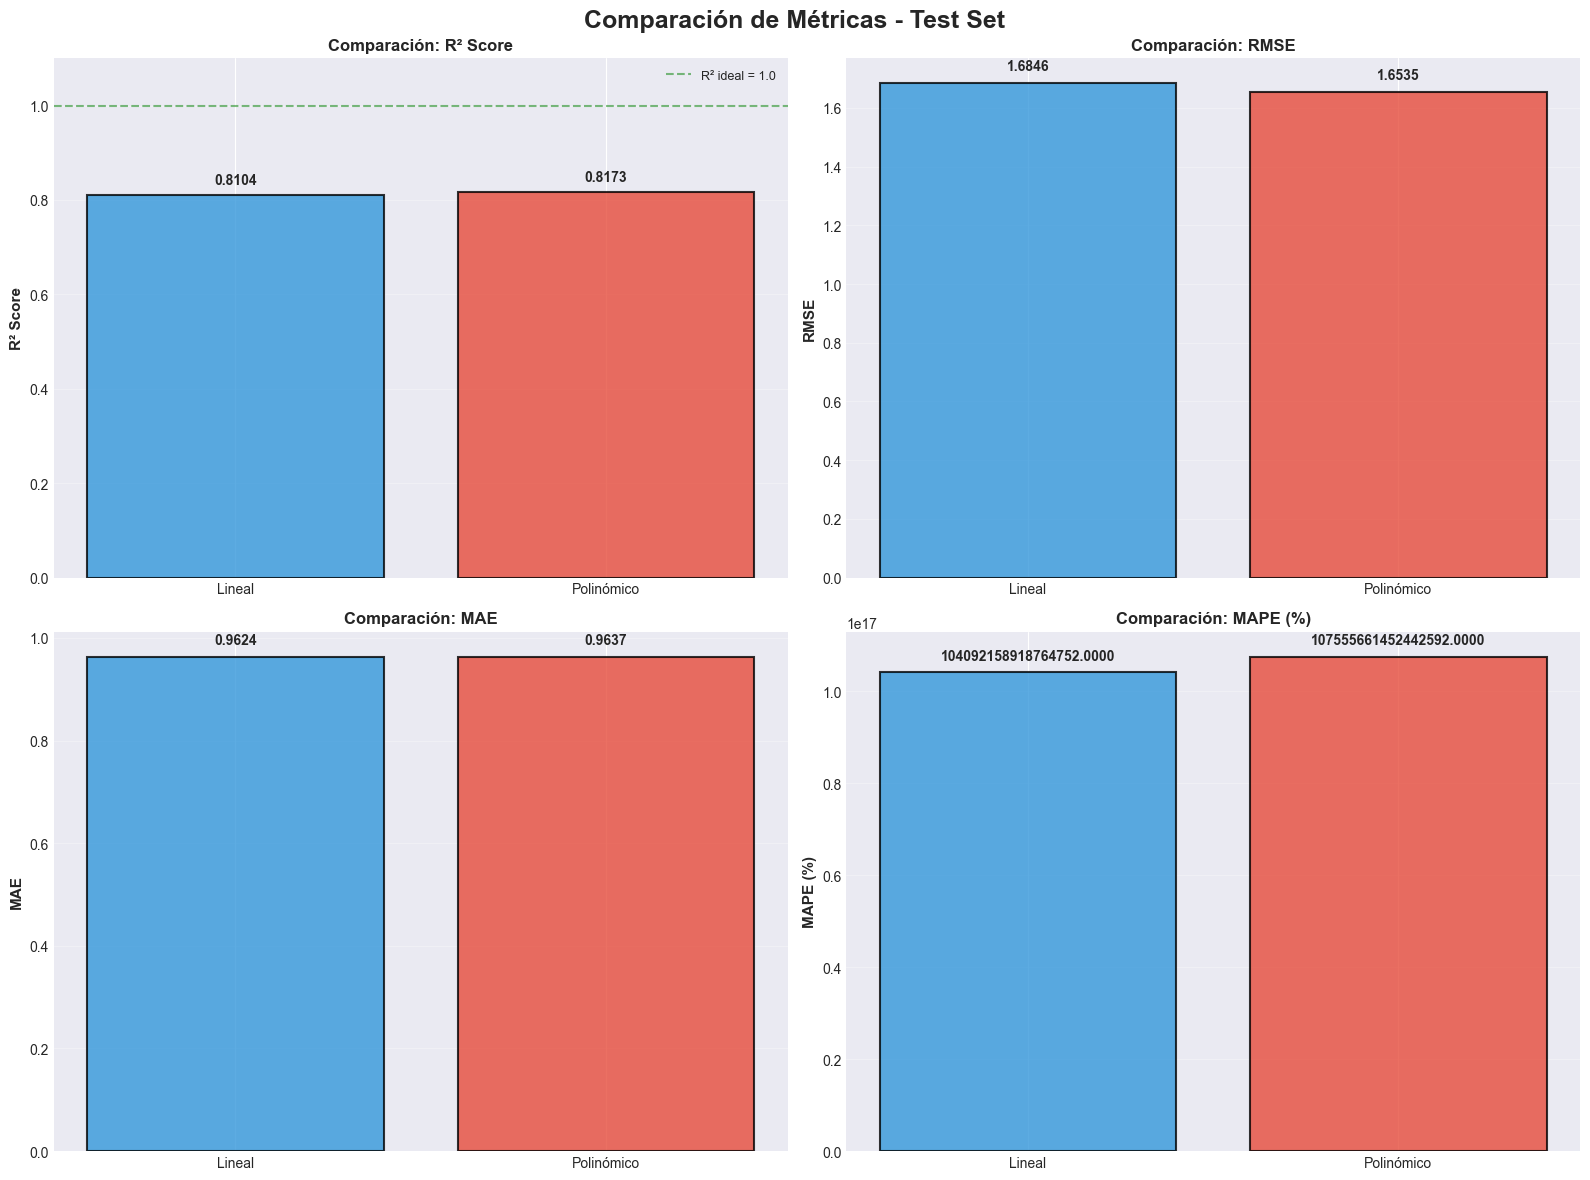

In [22]:
# CELDA 19: VISUALIZACIÓN - COMPARACIÓN DE MÉTRICAS (BARRAS)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comparación de Métricas - Test Set', fontsize=18, fontweight='bold')

metrics_data = {
    'R² Score': [r2_linear_test, r2_poly_test],
    'RMSE': [rmse_linear_test, rmse_poly_test],
    'MAE': [mae_linear_test, mae_poly_test],
    'MAPE (%)': [mape_linear_test, mape_poly_test]
}

models_labels = ['Lineal', 'Polinómico']
colors_bars = ['#3498db', '#e74c3c']

for idx, (metric_name, values) in enumerate(metrics_data.items()):
    row = idx // 2
    col = idx % 2
    
    bars = axes[row, col].bar(models_labels, values, color=colors_bars, alpha=0.8, 
                               edgecolor='black', linewidth=1.5)
    axes[row, col].set_ylabel(metric_name, fontsize=11, fontweight='bold')
    axes[row, col].set_title(f'Comparación: {metric_name}', fontsize=12, fontweight='bold')
    axes[row, col].grid(True, alpha=0.3, axis='y')
    
    for i, (bar, val) in enumerate(zip(bars, values)):
        height = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width()/2., height + height*0.02,
                           f'{val:.4f}', ha='center', va='bottom', fontweight='bold', fontsize=10)
    
    if metric_name == 'R² Score':
        axes[row, col].axhline(y=1.0, color='green', linestyle='--', linewidth=1.5, 
                              alpha=0.5, label='R² ideal = 1.0')
        axes[row, col].legend(fontsize=9)
        axes[row, col].set_ylim([0, 1.1])

plt.tight_layout()
plt.show()

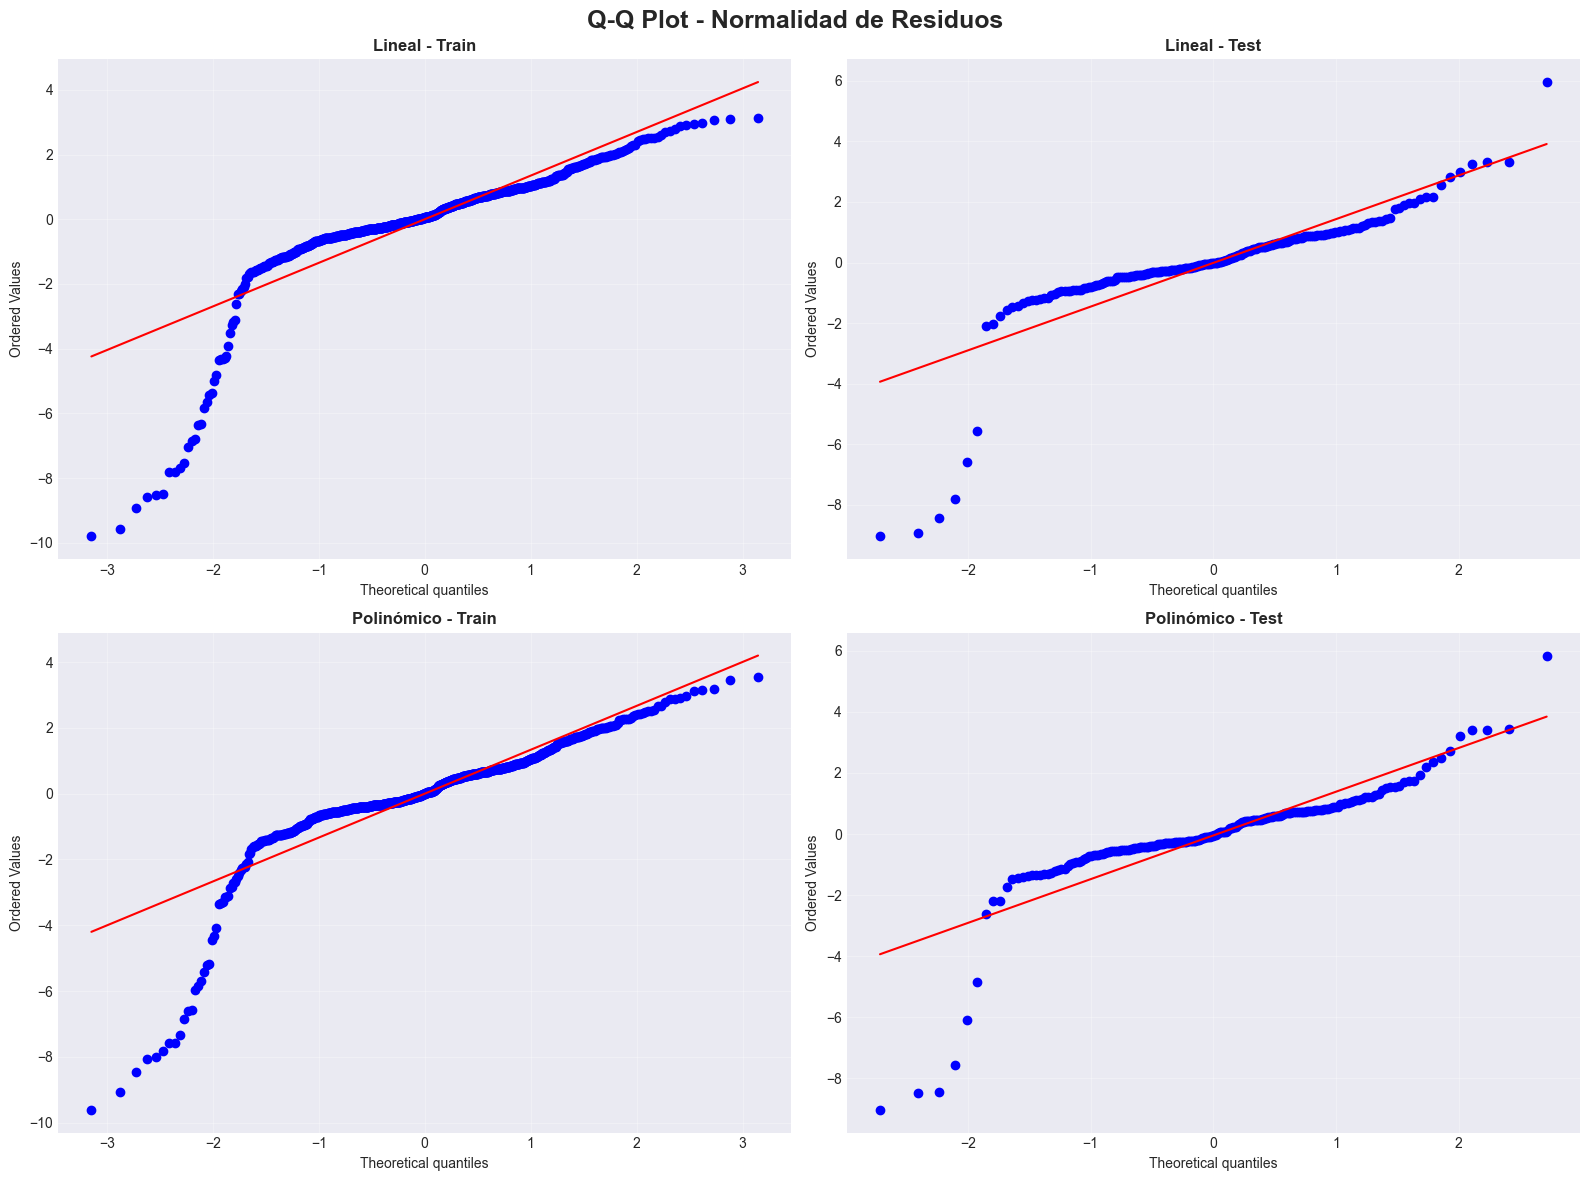

In [23]:
# CELDA 20: VISUALIZACIÓN - Q-Q PLOT
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Q-Q Plot - Normalidad de Residuos', fontsize=18, fontweight='bold')

qq_config = [
    (residuals_linear_train, 'Lineal - Train', 0, 0),
    (residuals_linear_test, 'Lineal - Test', 0, 1),
    (residuals_poly_train, 'Polinómico - Train', 1, 0),
    (residuals_poly_test, 'Polinómico - Test', 1, 1)
]

for residuals, title, row, col in qq_config:
    stats.probplot(residuals, dist="norm", plot=axes[row, col])
    axes[row, col].set_title(title, fontsize=12, fontweight='bold')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

C:\Users\juane\AppData\Local\Temp\ipykernel_14120\76647180.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(errors_data, labels=['Lineal', 'Polinómico'], patch_artist=True,


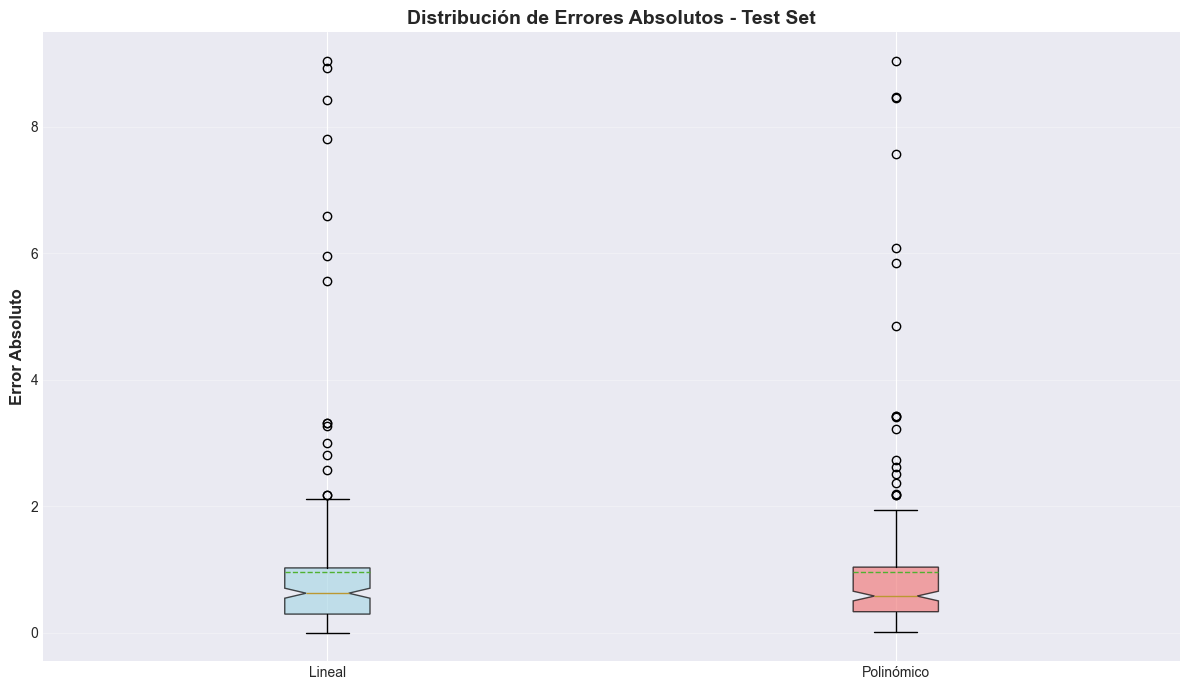

In [24]:
# CELDA 21: VISUALIZACIÓN - BOXPLOT DE ERRORES ABSOLUTOS
fig, ax = plt.subplots(figsize=(12, 7))

errors_data = [
    np.abs(residuals_linear_test),
    np.abs(residuals_poly_test)
]

bp = ax.boxplot(errors_data, labels=['Lineal', 'Polinómico'], patch_artist=True,
                notch=True, showmeans=True, meanline=True)

colors_box = ['lightblue', 'lightcoral']
for patch, color in zip(bp['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_ylabel('Error Absoluto', fontsize=12, fontweight='bold')
ax.set_title('Distribución de Errores Absolutos - Test Set', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

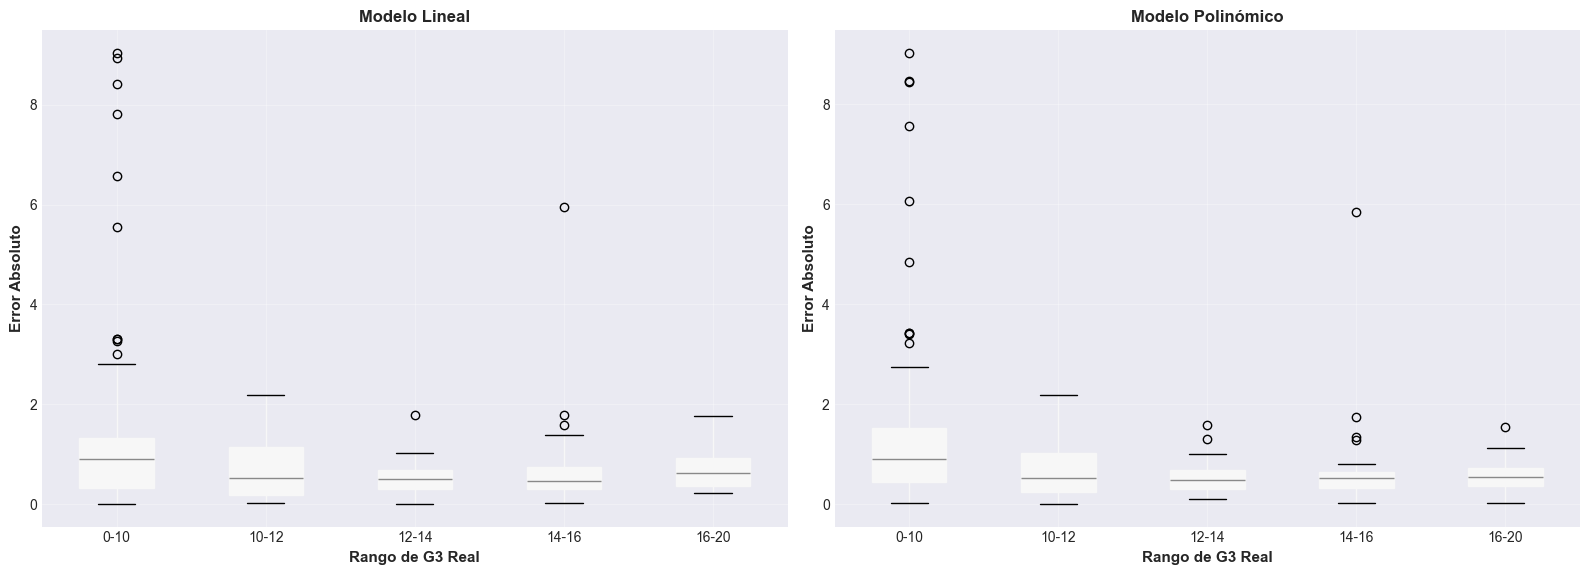

In [25]:
# CELDA 22: VISUALIZACIÓN - ERRORES POR RANGO DE CALIFICACIÓN
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Errores por Rango de Calificación Real', fontsize=16, fontweight='bold')

bins = [0, 10, 12, 14, 16, 20]
labels_bins = ['0-10', '10-12', '12-14', '14-16', '16-20']
y_test_binned = pd.cut(y_test.values, bins=bins, labels=labels_bins, include_lowest=True)

errors_by_range_linear = pd.DataFrame({
    'Rango': y_test_binned,
    'Error': np.abs(residuals_linear_test)
})

errors_by_range_poly = pd.DataFrame({
    'Rango': y_test_binned,
    'Error': np.abs(residuals_poly_test)
})

errors_by_range_linear.boxplot(column='Error', by='Rango', ax=axes[0], patch_artist=True)
axes[0].set_title('Modelo Lineal', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Rango de G3 Real', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Error Absoluto', fontsize=11, fontweight='bold')
axes[0].get_figure().suptitle('')
axes[0].grid(True, alpha=0.3)

errors_by_range_poly.boxplot(column='Error', by='Rango', ax=axes[1], patch_artist=True)
axes[1].set_title('Modelo Polinómico', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Rango de G3 Real', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Error Absoluto', fontsize=11, fontweight='bold')
axes[1].get_figure().suptitle('')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

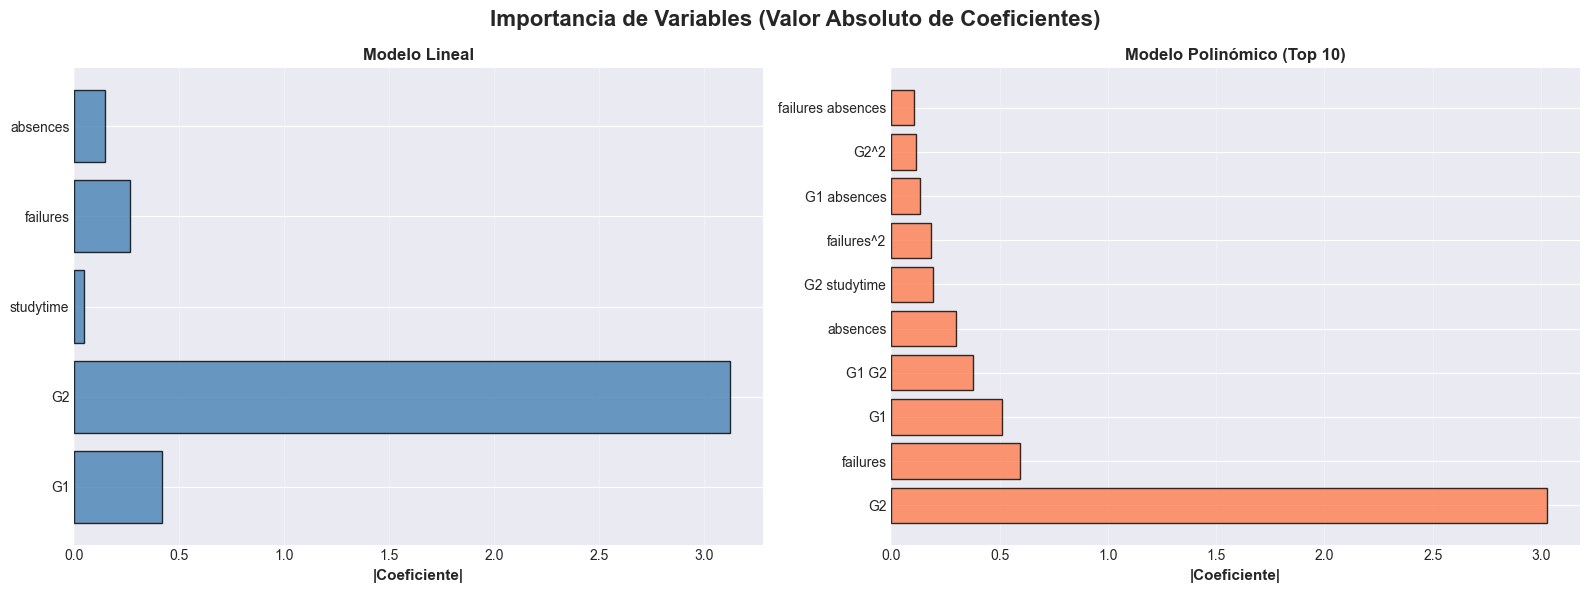

In [26]:
# CELDA 23: VISUALIZACIÓN - IMPORTANCIA DE VARIABLES
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Importancia de Variables (Valor Absoluto de Coeficientes)', fontsize=16, fontweight='bold')

# Modelo Lineal
coef_linear_abs = np.abs(linear_model.coef_)
axes[0].barh(features, coef_linear_abs, color='steelblue', alpha=0.8, edgecolor='black')
axes[0].set_xlabel('|Coeficiente|', fontsize=11, fontweight='bold')
axes[0].set_title('Modelo Lineal', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')

# Modelo Polinómico (top 10)
feature_names_poly = poly_features.get_feature_names_out(features)
coef_poly_abs = np.abs(poly_model.coef_)
top_10_idx = np.argsort(coef_poly_abs)[-10:][::-1]

axes[1].barh([feature_names_poly[i] for i in top_10_idx], 
             [coef_poly_abs[i] for i in top_10_idx], 
             color='coral', alpha=0.8, edgecolor='black')
axes[1].set_xlabel('|Coeficiente|', fontsize=11, fontweight='bold')
axes[1].set_title('Modelo Polinómico (Top 10)', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

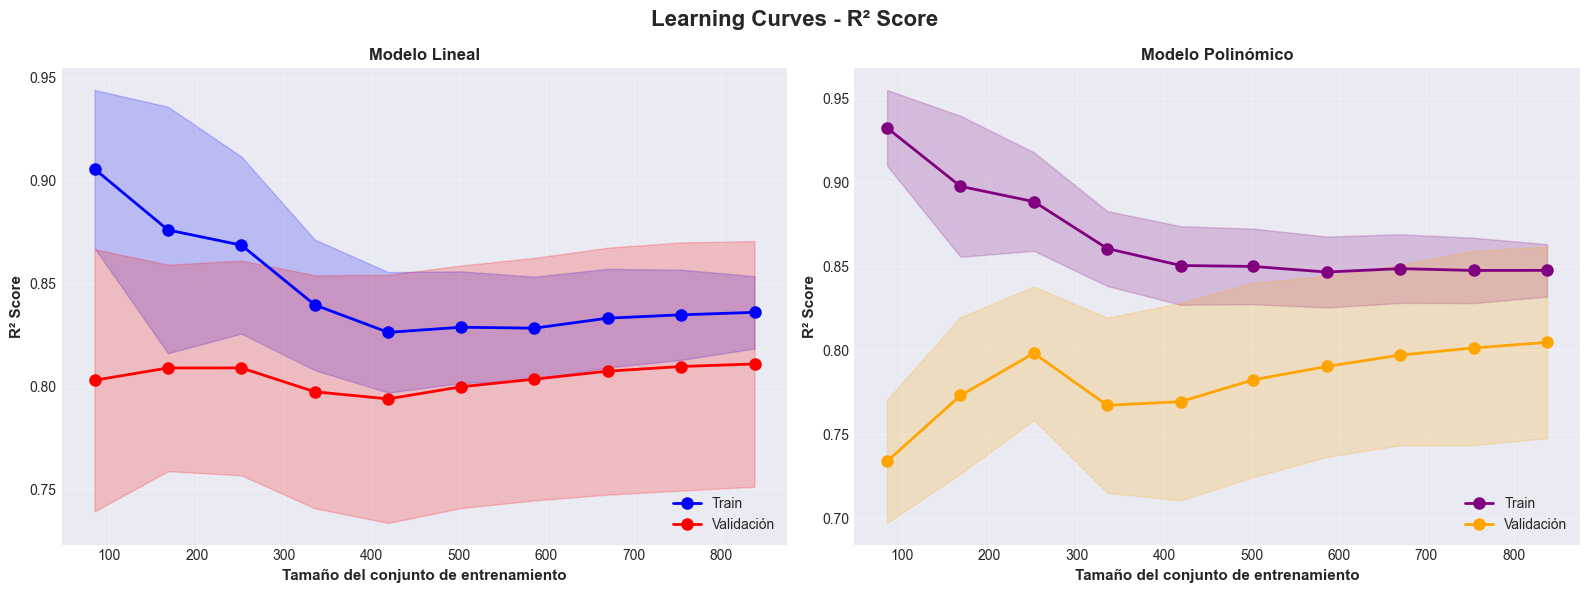

In [27]:
# CELDA 24: VISUALIZACIÓN - LEARNING CURVES
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Learning Curves - R² Score', fontsize=16, fontweight='bold')

train_sizes = np.linspace(0.1, 1.0, 10)

# Modelo Lineal
train_sizes_linear, train_scores_linear, val_scores_linear = learning_curve(
    linear_model, X_scaled, y, train_sizes=train_sizes, cv=5, scoring='r2', n_jobs=-1
)

axes[0].plot(train_sizes_linear, train_scores_linear.mean(axis=1), 'o-', 
             color='blue', label='Train', linewidth=2, markersize=8)
axes[0].plot(train_sizes_linear, val_scores_linear.mean(axis=1), 'o-', 
             color='red', label='Validación', linewidth=2, markersize=8)
axes[0].fill_between(train_sizes_linear, 
                     train_scores_linear.mean(axis=1) - train_scores_linear.std(axis=1),
                     train_scores_linear.mean(axis=1) + train_scores_linear.std(axis=1),
                     alpha=0.2, color='blue')
axes[0].fill_between(train_sizes_linear, 
                     val_scores_linear.mean(axis=1) - val_scores_linear.std(axis=1),
                     val_scores_linear.mean(axis=1) + val_scores_linear.std(axis=1),
                     alpha=0.2, color='red')
axes[0].set_xlabel('Tamaño del conjunto de entrenamiento', fontsize=11, fontweight='bold')
axes[0].set_ylabel('R² Score', fontsize=11, fontweight='bold')
axes[0].set_title('Modelo Lineal', fontsize=12, fontweight='bold')
axes[0].legend(loc='lower right', fontsize=10)
axes[0].grid(True, alpha=0.3)

# Modelo Polinómico
train_sizes_poly, train_scores_poly, val_scores_poly = learning_curve(
    poly_model, X_scaled_poly, y, train_sizes=train_sizes, cv=5, scoring='r2', n_jobs=-1
)

axes[1].plot(train_sizes_poly, train_scores_poly.mean(axis=1), 'o-', 
             color='purple', label='Train', linewidth=2, markersize=8)
axes[1].plot(train_sizes_poly, val_scores_poly.mean(axis=1), 'o-', 
             color='orange', label='Validación', linewidth=2, markersize=8)
axes[1].fill_between(train_sizes_poly, 
                     train_scores_poly.mean(axis=1) - train_scores_poly.std(axis=1),
                     train_scores_poly.mean(axis=1) + train_scores_poly.std(axis=1),
                     alpha=0.2, color='purple')
axes[1].fill_between(train_sizes_poly, 
                     val_scores_poly.mean(axis=1) - val_scores_poly.std(axis=1),
                     val_scores_poly.mean(axis=1) + val_scores_poly.std(axis=1),
                     alpha=0.2, color='orange')
axes[1].set_xlabel('Tamaño del conjunto de entrenamiento', fontsize=11, fontweight='bold')
axes[1].set_ylabel('R² Score', fontsize=11, fontweight='bold')
axes[1].set_title('Modelo Polinómico', fontsize=12, fontweight='bold')
axes[1].legend(loc='lower right', fontsize=10)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

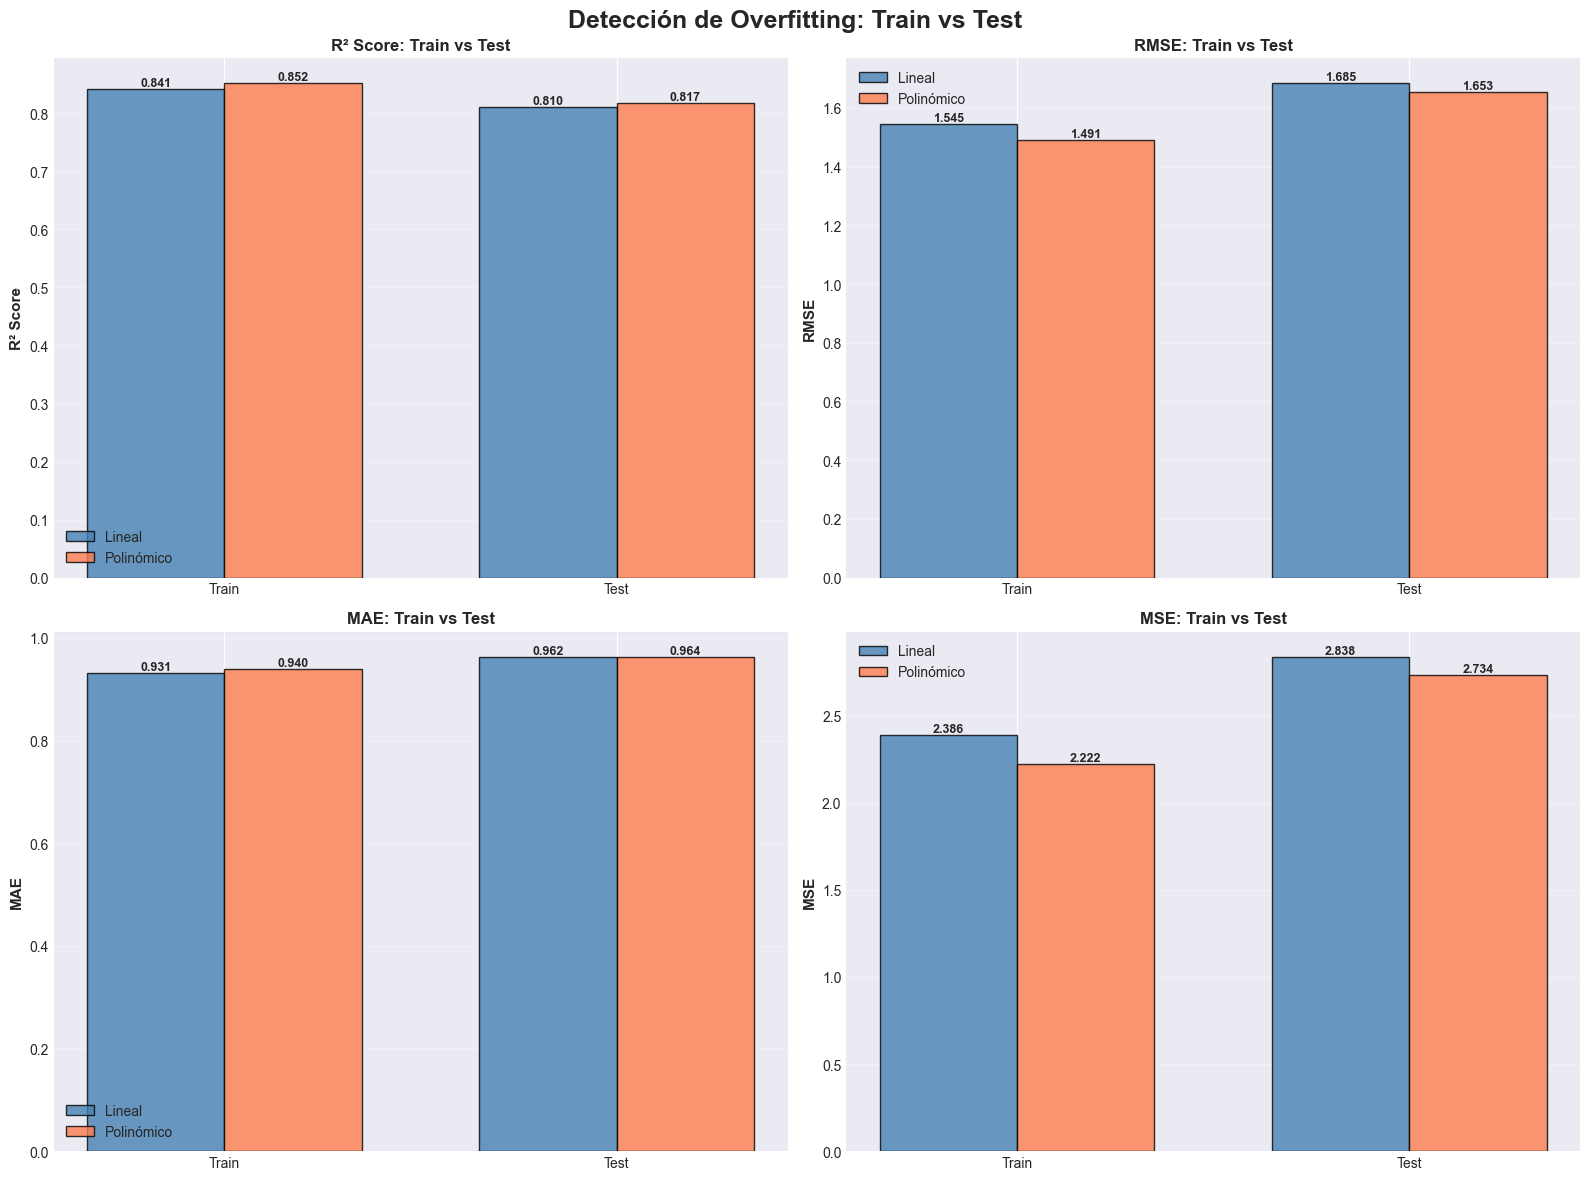

In [28]:
# CELDA 25: VISUALIZACIÓN - OVERFITTING DETECTION (TRAIN VS TEST)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Detección de Overfitting: Train vs Test', fontsize=18, fontweight='bold')

metrics_comparison = [
    ('R² Score', [r2_linear_train, r2_linear_test, r2_poly_train, r2_poly_test], 0, 0),
    ('RMSE', [rmse_linear_train, rmse_linear_test, rmse_poly_train, rmse_poly_test], 0, 1),
    ('MAE', [mae_linear_train, mae_linear_test, mae_poly_train, mae_poly_test], 1, 0),
    ('MSE', [mse_linear_train, mse_linear_test, mse_poly_train, mse_poly_test], 1, 1)
]

x_pos = np.arange(2)
width = 0.35

for metric_name, values, row, col in metrics_comparison:
    linear_vals = [values[0], values[1]]
    poly_vals = [values[2], values[3]]
    
    bars1 = axes[row, col].bar(x_pos - width/2, linear_vals, width, label='Lineal', 
                               color='steelblue', alpha=0.8, edgecolor='black')
    bars2 = axes[row, col].bar(x_pos + width/2, poly_vals, width, label='Polinómico', 
                               color='coral', alpha=0.8, edgecolor='black')
    
    axes[row, col].set_ylabel(metric_name, fontsize=11, fontweight='bold')
    axes[row, col].set_title(f'{metric_name}: Train vs Test', fontsize=12, fontweight='bold')
    axes[row, col].set_xticks(x_pos)
    axes[row, col].set_xticklabels(['Train', 'Test'])
    axes[row, col].legend(fontsize=10)
    axes[row, col].grid(True, alpha=0.3, axis='y')
    
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            axes[row, col].text(bar.get_x() + bar.get_width()/2., height,
                               f'{height:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

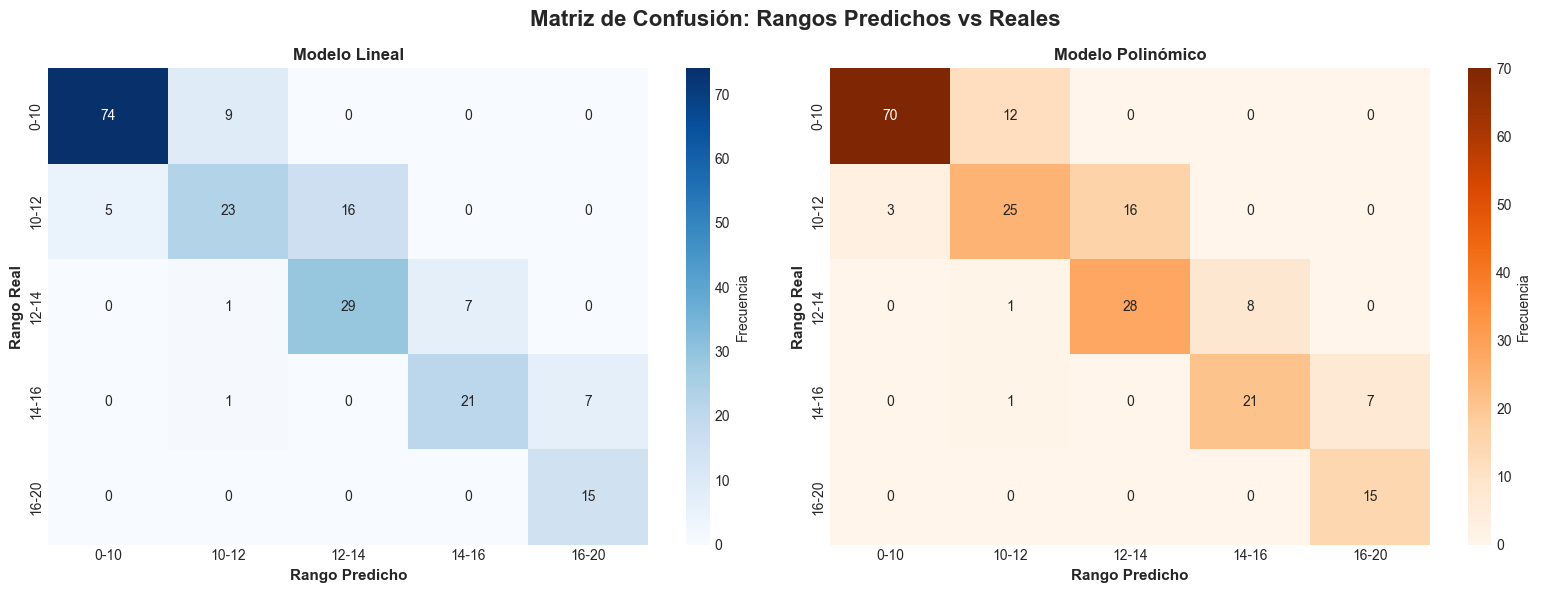

In [ ]:
# CELDA 26: VISUALIZACIÓN - MATRIZ DE CONFUSIÓN (RANGOS)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Matriz de Confusión: Rangos Predichos vs Reales', fontsize=16, fontweight='bold')

# Asegurar que labels_bins sean strings
labels_bins = [str(label) for label in labels_bins]

# Discretizar valores y convertir a string
y_test_discrete = pd.cut(y_test.values, bins=bins, labels=labels_bins, include_lowest=True).astype(str)
y_pred_linear_discrete = pd.cut(y_pred_linear_test, bins=bins, labels=labels_bins, include_lowest=True).astype(str)
y_pred_poly_discrete = pd.cut(y_pred_poly_test, bins=bins, labels=labels_bins, include_lowest=True).astype(str)

# Matriz de confusión Lineal
cm_linear = confusion_matrix(y_test_discrete, y_pred_linear_discrete, labels=labels_bins)
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues', xticklabels=labels_bins, 
            yticklabels=labels_bins, ax=axes[0], cbar_kws={'label': 'Frecuencia'})
axes[0].set_xlabel('Rango Predicho', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Rango Real', fontsize=11, fontweight='bold')
axes[0].set_title('Modelo Lineal', fontsize=12, fontweight='bold')

# Matriz de confusión Polinómica
cm_poly = confusion_matrix(y_test_discrete, y_pred_poly_discrete, labels=labels_bins)
sns.heatmap(cm_poly, annot=True, fmt='d', cmap='Oranges', xticklabels=labels_bins, 
            yticklabels=labels_bins, ax=axes[1], cbar_kws={'label': 'Frecuencia'})
axes[1].set_xlabel('Rango Predicho', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Rango Real', fontsize=11, fontweight='bold')
axes[1].set_title('Modelo Polinómico', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


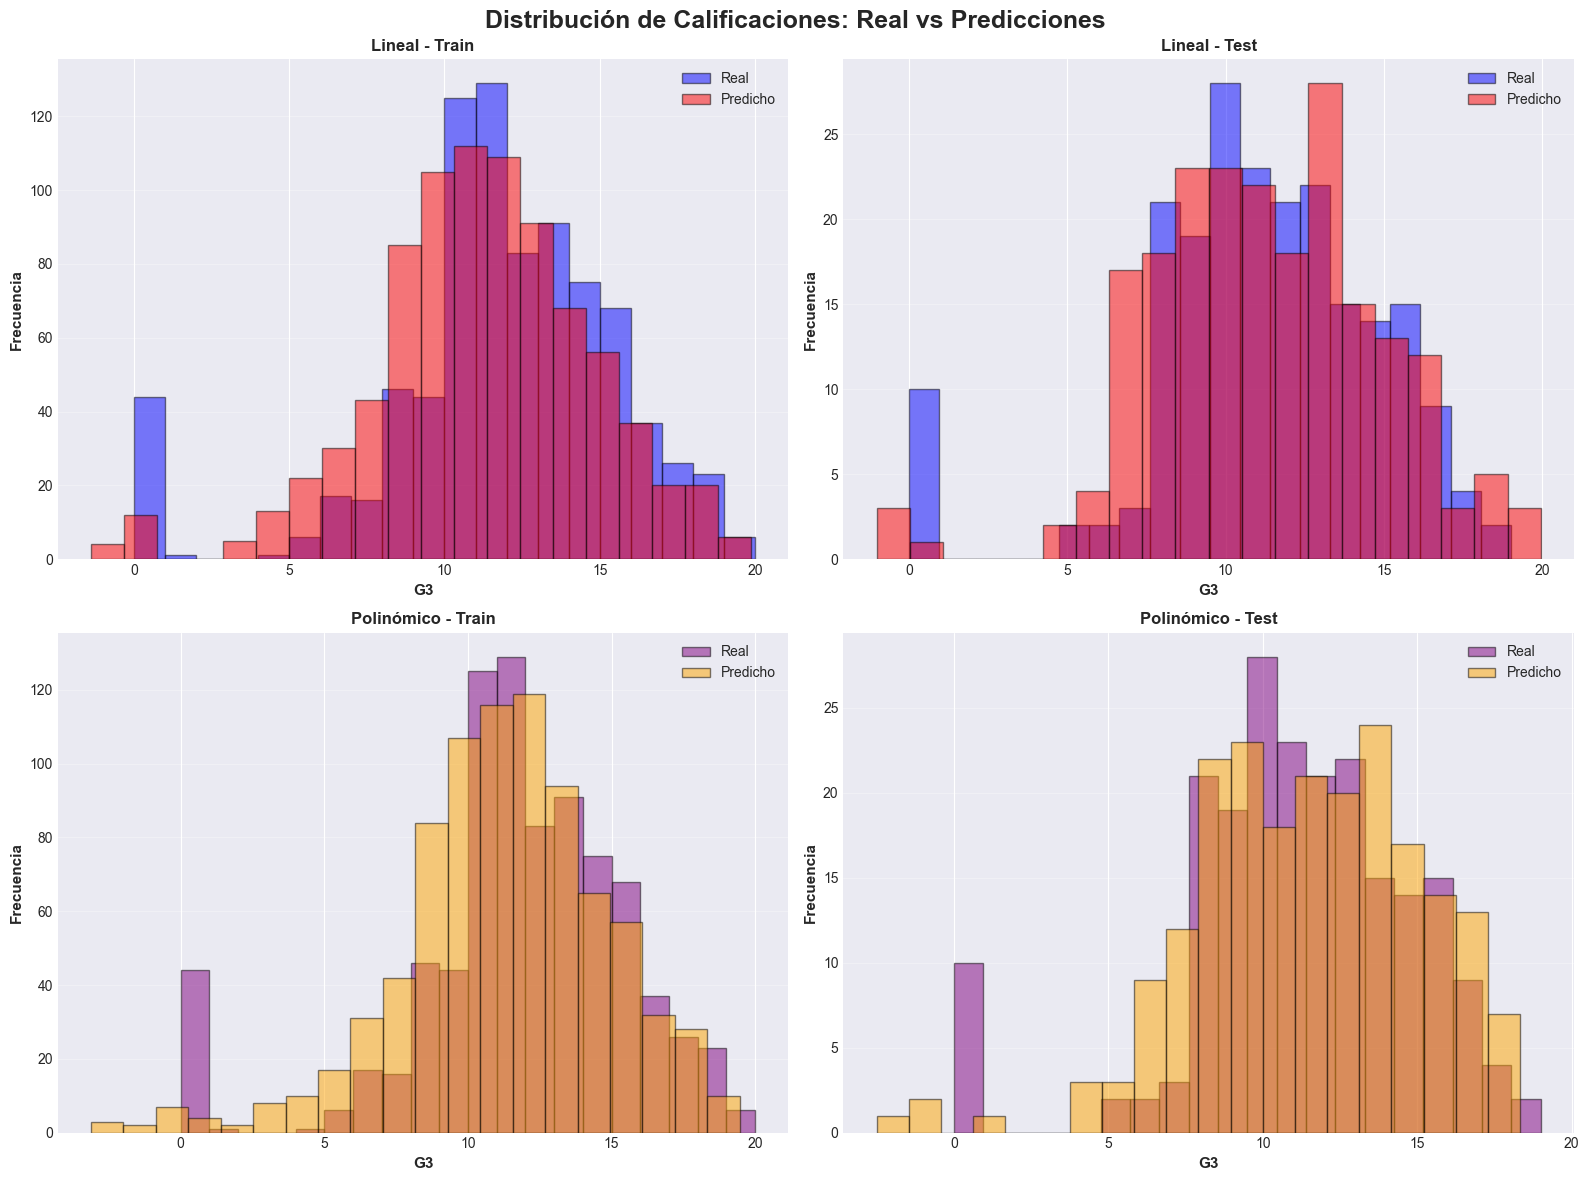

In [31]:
# CELDA 27: VISUALIZACIÓN - DISTRIBUCIÓN DE PREDICCIONES VS REAL
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribución de Calificaciones: Real vs Predicciones', fontsize=18, fontweight='bold')

# Train Lineal
axes[0, 0].hist(y_train, bins=20, alpha=0.5, color='blue', label='Real', edgecolor='black')
axes[0, 0].hist(y_pred_linear_train, bins=20, alpha=0.5, color='red', label='Predicho', edgecolor='black')
axes[0, 0].set_xlabel('G3', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Frecuencia', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Lineal - Train', fontsize=12, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Test Lineal
axes[0, 1].hist(y_test, bins=20, alpha=0.5, color='blue', label='Real', edgecolor='black')
axes[0, 1].hist(y_pred_linear_test, bins=20, alpha=0.5, color='red', label='Predicho', edgecolor='black')
axes[0, 1].set_xlabel('G3', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Frecuencia', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Lineal - Test', fontsize=12, fontweight='bold')
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Train Polinómico
axes[1, 0].hist(y_train, bins=20, alpha=0.5, color='purple', label='Real', edgecolor='black')
axes[1, 0].hist(y_pred_poly_train, bins=20, alpha=0.5, color='orange', label='Predicho', edgecolor='black')
axes[1, 0].set_xlabel('G3', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Frecuencia', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Polinómico - Train', fontsize=12, fontweight='bold')
axes[1, 0].legend(fontsize=10)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Test Polinómico
axes[1, 1].hist(y_test, bins=20, alpha=0.5, color='purple', label='Real', edgecolor='black')
axes[1, 1].hist(y_pred_poly_test, bins=20, alpha=0.5, color='orange', label='Predicho', edgecolor='black')
axes[1, 1].set_xlabel('G3', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Frecuencia', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Polinómico - Test', fontsize=12, fontweight='bold')
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

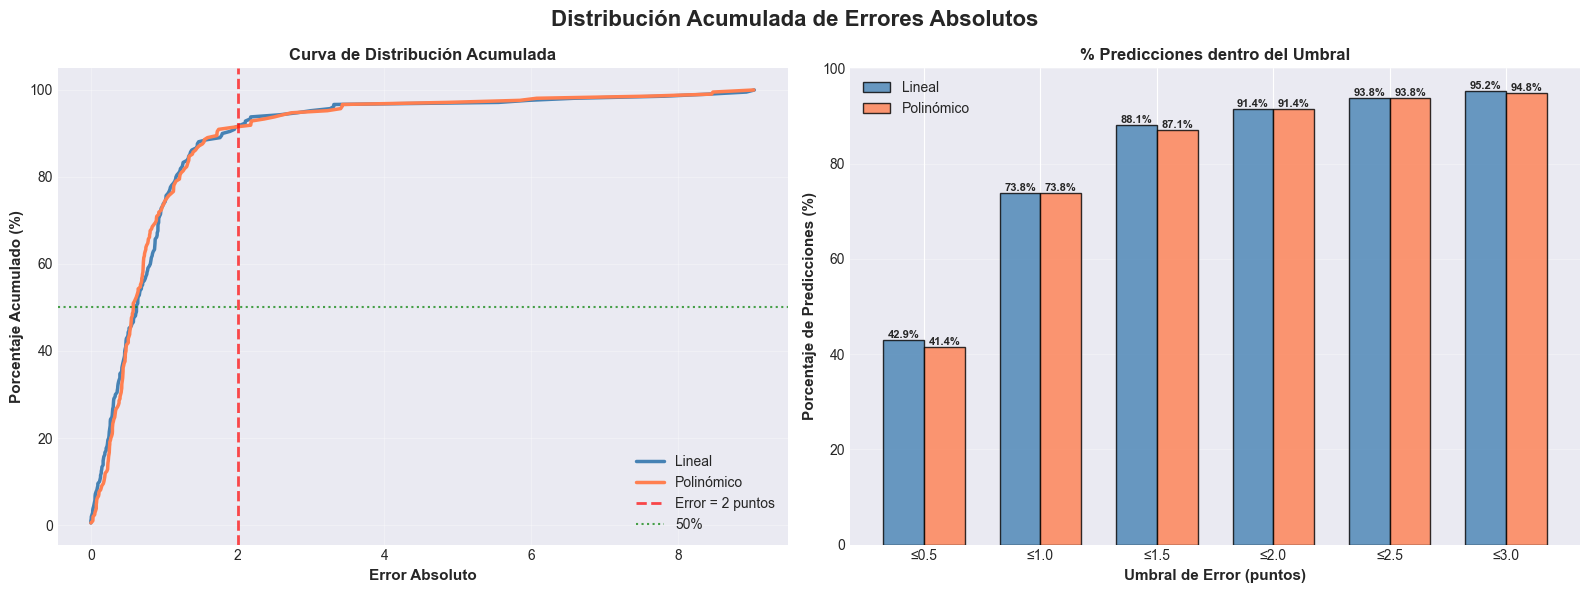

In [32]:
# CELDA 28: VISUALIZACIÓN - DISTRIBUCIÓN ACUMULADA DE ERRORES
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Distribución Acumulada de Errores Absolutos', fontsize=16, fontweight='bold')

# Ordenar errores
errors_linear_sorted = np.sort(np.abs(residuals_linear_test))
errors_poly_sorted = np.sort(np.abs(residuals_poly_test))

cumulative_linear = np.arange(1, len(errors_linear_sorted) + 1) / len(errors_linear_sorted) * 100
cumulative_poly = np.arange(1, len(errors_poly_sorted) + 1) / len(errors_poly_sorted) * 100

axes[0].plot(errors_linear_sorted, cumulative_linear, linewidth=2.5, color='steelblue', label='Lineal')
axes[0].plot(errors_poly_sorted, cumulative_poly, linewidth=2.5, color='coral', label='Polinómico')
axes[0].axvline(x=2, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Error = 2 puntos')
axes[0].axhline(y=50, color='green', linestyle=':', linewidth=1.5, alpha=0.7, label='50%')
axes[0].set_xlabel('Error Absoluto', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Porcentaje Acumulado (%)', fontsize=11, fontweight='bold')
axes[0].set_title('Curva de Distribución Acumulada', fontsize=12, fontweight='bold')
axes[0].legend(fontsize=10)
axes[0].grid(True, alpha=0.3)

# Porcentaje de errores menores a umbrales
thresholds = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
pct_linear = [np.sum(np.abs(residuals_linear_test) <= t) / len(residuals_linear_test) * 100 for t in thresholds]
pct_poly = [np.sum(np.abs(residuals_poly_test) <= t) / len(residuals_poly_test) * 100 for t in thresholds]

x_pos_thresh = np.arange(len(thresholds))
width_thresh = 0.35

bars1 = axes[1].bar(x_pos_thresh - width_thresh/2, pct_linear, width_thresh, 
                    label='Lineal', color='steelblue', alpha=0.8, edgecolor='black')
bars2 = axes[1].bar(x_pos_thresh + width_thresh/2, pct_poly, width_thresh, 
                    label='Polinómico', color='coral', alpha=0.8, edgecolor='black')

axes[1].set_xlabel('Umbral de Error (puntos)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Porcentaje de Predicciones (%)', fontsize=11, fontweight='bold')
axes[1].set_title('% Predicciones dentro del Umbral', fontsize=12, fontweight='bold')
axes[1].set_xticks(x_pos_thresh)
axes[1].set_xticklabels([f'≤{t}' for t in thresholds])
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3, axis='y')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}%', ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.show()

In [50]:
print("="*80)
print("ANÁLISIS DE PREDICCIONES INDIVIDUALES")
print("="*80)

# Asegurar arrays NumPy
y_test_array = np.array(y_test)
y_pred_linear_test = np.array(y_pred_linear_test)
y_pred_poly_test = np.array(y_pred_poly_test)

# Calcular errores absolutos
errors_linear_abs = np.abs(y_test_array - y_pred_linear_test)
errors_poly_abs = np.abs(y_test_array - y_pred_poly_test)

# Top 5 mejores y peores predicciones
best_idx_linear = np.argsort(errors_linear_abs)[:5]
worst_idx_linear = np.argsort(errors_linear_abs)[-5:]

best_idx_poly = np.argsort(errors_poly_abs)[:5]
worst_idx_poly = np.argsort(errors_poly_abs)[-5:]

print("\nMODELO LINEAL - TOP 5 MEJORES PREDICCIONES:")
print(f"{'Real':>6} {'Predicho':>10} {'Error':>8}")
print("-" * 28)
for idx in best_idx_linear:
    print(f"{y_test_array[idx]:6.2f} {y_pred_linear_test[idx]:10.2f} {errors_linear_abs[idx]:8.4f}")

print("\nMODELO LINEAL - TOP 5 PEORES PREDICCIONES:")
print(f"{'Real':>6} {'Predicho':>10} {'Error':>8}")
print("-" * 28)
for idx in worst_idx_linear:
    print(f"{y_test_array[idx]:6.2f} {y_pred_linear_test[idx]:10.2f} {errors_linear_abs[idx]:8.4f}")

print("\nMODELO POLINÓMICO - TOP 5 MEJORES PREDICCIONES:")
print(f"{'Real':>6} {'Predicho':>10} {'Error':>8}")
print("-" * 28)
for idx in best_idx_poly:
    print(f"{y_test_array[idx]:6.2f} {y_pred_poly_test[idx]:10.2f} {errors_poly_abs[idx]:8.4f}")

print("\nMODELO POLINÓMICO - TOP 5 PEORES PREDICCIONES:")
print(f"{'Real':>6} {'Predicho':>10} {'Error':>8}")
print("-" * 28)
for idx in worst_idx_poly:
    print(f"{y_test_array[idx]:6.2f} {y_pred_poly_test[idx]:10.2f} {errors_poly_abs[idx]:8.4f}")


ANÁLISIS DE PREDICCIONES INDIVIDUALES

MODELO LINEAL - TOP 5 MEJORES PREDICCIONES:
  Real   Predicho    Error
----------------------------
  9.00       9.00   0.0005
 13.00      13.00   0.0007
 10.00      10.01   0.0059
  0.00       0.01   0.0072
 15.00      14.98   0.0156

MODELO LINEAL - TOP 5 PEORES PREDICCIONES:
  Real   Predicho    Error
----------------------------
  0.00       6.58   6.5808
  0.00       7.81   7.8091
  0.00       8.42   8.4178
  0.00       8.93   8.9289
  0.00       9.04   9.0373

MODELO POLINÓMICO - TOP 5 MEJORES PREDICCIONES:
  Real   Predicho    Error
----------------------------
 12.00      12.00   0.0015
  8.00       8.03   0.0278
 18.00      18.03   0.0294
 15.00      14.97   0.0304
 10.00      10.05   0.0527

MODELO POLINÓMICO - TOP 5 PEORES PREDICCIONES:
  Real   Predicho    Error
----------------------------
  0.00       6.07   6.0720
  0.00       7.57   7.5731
  0.00       8.46   8.4552
  0.00       8.47   8.4734
  0.00       9.03   9.0301


In [44]:
# CELDA 30: ESTADÍSTICAS DETALLADAS DE RESIDUOS
print("="*80)
print("ESTADÍSTICAS DETALLADAS DE RESIDUOS")
print("="*80)

# Test de normalidad
shapiro_linear = shapiro(residuals_linear_test)
shapiro_poly = shapiro(residuals_poly_test)
jb_linear = jarque_bera(residuals_linear_test)
jb_poly = jarque_bera(residuals_poly_test)

print("\nMODELO LINEAL:")
print(f"  Media de residuos: {residuals_linear_test.mean():.6f}")
print(f"  Mediana de residuos: {np.median(residuals_linear_test):.6f}")
print(f"  Desviación estándar: {residuals_linear_test.std():.6f}")
print(f"  Asimetría (skewness): {pd.Series(residuals_linear_test).skew():.6f}")
print(f"  Curtosis: {pd.Series(residuals_linear_test).kurtosis():.6f}")
print(f"  Shapiro-Wilk Test: estadístico={shapiro_linear[0]:.6f}, p-value={shapiro_linear[1]:.6f}")
print(f"  Jarque-Bera Test: estadístico={jb_linear[0]:.6f}, p-value={jb_linear[1]:.6f}")

print("\nMODELO POLINÓMICO:")
print(f"  Media de residuos: {residuals_poly_test.mean():.6f}")
print(f"  Mediana de residuos: {np.median(residuals_poly_test):.6f}")
print(f"  Desviación estándar: {residuals_poly_test.std():.6f}")
print(f"  Asimetría (skewness): {pd.Series(residuals_poly_test).skew():.6f}")
print(f"  Curtosis: {pd.Series(residuals_poly_test).kurtosis():.6f}")
print(f"  Shapiro-Wilk Test: estadístico={shapiro_poly[0]:.6f}, p-value={shapiro_poly[1]:.6f}")
print(f"  Jarque-Bera Test: estadístico={jb_poly[0]:.6f}, p-value={jb_poly[1]:.6f}")

ESTADÍSTICAS DETALLADAS DE RESIDUOS

MODELO LINEAL:
  Media de residuos: -0.010758
  Mediana de residuos: -0.006553
  Desviación estándar: 1.688604
  Asimetría (skewness): -2.529378
  Curtosis: 13.043361
  Shapiro-Wilk Test: estadístico=0.728738, p-value=0.000000
  Jarque-Bera Test: estadístico=1633.445143, p-value=0.000000

MODELO POLINÓMICO:
  Media de residuos: -0.044280
  Mediana de residuos: -0.041065
  Desviación estándar: 1.656831
  Asimetría (skewness): -2.382372
  Curtosis: 12.508396
  Shapiro-Wilk Test: estadístico=0.744465, p-value=0.000000
  Jarque-Bera Test: estadístico=1494.777810, p-value=0.000000


In [45]:
# CELDA 31: INTERVALOS DE CONFIANZA
print("="*80)
print("INTERVALOS DE CONFIANZA (95%)")
print("="*80)

# Error estándar
se_linear = rmse_linear_test
se_poly = rmse_poly_test

# Intervalo de confianza 95%
ci_95_linear = 1.96 * se_linear
ci_95_poly = 1.96 * se_poly

print(f"\nMODELO LINEAL:")
print(f"  Intervalo de confianza 95%: ±{ci_95_linear:.4f} puntos")
print(f"  Rango típico de error: [{-ci_95_linear:.4f}, {ci_95_linear:.4f}]")

print(f"\nMODELO POLINÓMICO:")
print(f"  Intervalo de confianza 95%: ±{ci_95_poly:.4f} puntos")
print(f"  Rango típico de error: [{-ci_95_poly:.4f}, {ci_95_poly:.4f}]")

INTERVALOS DE CONFIANZA (95%)

MODELO LINEAL:
  Intervalo de confianza 95%: ±3.3018 puntos
  Rango típico de error: [-3.3018, 3.3018]

MODELO POLINÓMICO:
  Intervalo de confianza 95%: ±3.2408 puntos
  Rango típico de error: [-3.2408, 3.2408]


In [46]:
# CELDA 32: RESUMEN EJECUTIVO FINAL
print("="*80)
print("RESUMEN EJECUTIVO FINAL")
print("="*80)

summary_executive = pd.DataFrame({
    'Aspecto': [
        'R² Test',
        'RMSE Test',
        'MAE Test',
        'MAPE Test (%)',
        'CV R² (mean±std)',
        'Características',
        'Mejor en Train',
        'Mejor en Test',
        'Overfitting',
        'Interpretabilidad'
    ],
    'Lineal': [
        f'{r2_linear_test:.4f}',
        f'{rmse_linear_test:.4f}',
        f'{mae_linear_test:.4f}',
        f'{mape_linear_test:.2f}',
        f'{cv_scores_linear.mean():.4f}±{cv_scores_linear.std():.4f}',
        '5',
        '❌' if r2_linear_train < r2_poly_train else '✅',
        '❌' if r2_linear_test < r2_poly_test else '✅',
        '✅ Bajo' if (r2_linear_train - r2_linear_test) < 0.05 else '⚠️ Moderado',
        '✅ Alta'
    ],
    'Polinómico': [
        f'{r2_poly_test:.4f}',
        f'{rmse_poly_test:.4f}',
        f'{mae_poly_test:.4f}',
        f'{mape_poly_test:.2f}',
        f'{cv_scores_poly.mean():.4f}±{cv_scores_poly.std():.4f}',
        f'{X_train_poly.shape[1]}',
        '✅' if r2_poly_train >= r2_linear_train else '❌',
        '✅' if r2_poly_test >= r2_linear_test else '❌',
        '✅ Bajo' if (r2_poly_train - r2_poly_test) < 0.05 else '⚠️ Moderado',
        '⚠️ Media'
    ]
})

print("\n")
print(summary_executive.to_string(index=False))

RESUMEN EJECUTIVO FINAL


          Aspecto                Lineal            Polinómico
          R² Test                0.8104                0.8173
        RMSE Test                1.6846                1.6535
         MAE Test                0.9624                0.9637
    MAPE Test (%) 104092158918764752.00 107555661452442592.00
 CV R² (mean±std)         0.8109±0.0597         0.8047±0.0570
  Características                     5                    20
   Mejor en Train                     ❌                     ✅
    Mejor en Test                     ❌                     ✅
      Overfitting                ✅ Bajo                ✅ Bajo
Interpretabilidad                ✅ Alta              ⚠️ Media


In [47]:
# CELDA 33: RECOMENDACIÓN FINAL
print("="*80)
print("RECOMENDACIÓN FINAL")
print("="*80)

if r2_poly_test > r2_linear_test and (r2_poly_test - r2_linear_test) > 0.01:
    print("✅ MODELO RECOMENDADO: POLINÓMICO")
    print(f"   Razón: Mejor R² ({r2_poly_test:.4f} vs {r2_linear_test:.4f})")
    print(f"   Mejora: {((r2_poly_test - r2_linear_test) / r2_linear_test * 100):.2f}%")
elif r2_linear_test >= r2_poly_test:
    print("✅ MODELO RECOMENDADO: LINEAL")
    print(f"   Razón: Similar o mejor rendimiento con mayor simplicidad")
    print(f"   R² similar: Lineal {r2_linear_test:.4f} vs Polinómico {r2_poly_test:.4f}")
else:
    print("⚖️ MODELOS EQUIPARABLES")
    print(f"   Diferencia marginal en R²: {abs(r2_poly_test - r2_linear_test):.4f}")
    print("   Considerar: Lineal para interpretabilidad, Polinómico para precisión")

print("\n" + "="*80)
print("ANÁLISIS COMPLETADO")
print("="*80)

RECOMENDACIÓN FINAL
⚖️ MODELOS EQUIPARABLES
   Diferencia marginal en R²: 0.0069
   Considerar: Lineal para interpretabilidad, Polinómico para precisión

ANÁLISIS COMPLETADO
